<font size="6">  Se familiariser avec le Machine Learning 👶🏻 </font>

## Environnement de travail

Lien utile pour customiser son jupyter notebook 🚀 <br>
https://towardsdatascience.com/jupyter-tools-to-increase-productivity-7b3c6b90be09

In [1]:
path = "/content/drive/MyDrive/Pro/Formation/M2 SISE/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importer les librairies utiles

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Liste des librairies utilisées dans ce notebook

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
from scipy import interp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from statistics import mean

Fonctions utilisés dans le notebook

In [7]:
def alerteCombinaison(dictionary_param):
    """
    Cette fonction est utilisée pour calculer le nombre de combinaison
    défini des GridSearch pour optimiser les paramtètres des modèles.
    Elle prend en entrée un dictionnaire et retourne le nombre de combinaison
    """
    from numpy import prod
    lengths = [len(v) for v in parameters.values()]
    count = prod(lengths)
    if count < 500:
        print("C'est bon tu peux envoyer l'apprentissage !")
    elif count < 1000:
        print("Tu peux lire tes mails pendant l'apprentissage !")
    elif count < 2000:
        print("Tu peux répondre à tes mails pendant l'apprentissage !")
    else:
        print("Tu peux mettre ton PC en veille et revenir demain !")

    print("Nombre de combinaison :")
    return(count)

#Exemple
# parameters = { 'param1' : [1,2,3,4,5],
#               'param2' : [1,2,3,4,5],
#              'param3' : [1,2] }

# print(alerteCombinaison(parameters))

# Classification

<font size="4"> L'étude de cas se base sur le jeu de données Titanic 🧊⛴  </font>

Importer le jeu de données

In [8]:
df_Titanic = pd.read_csv(path + 'Titanic.csv')

Afficher un extrait du dataset

In [10]:
df = df_Titanic

In [11]:
# from scipy.stats import bartlett
# bartlett(df['Age'][df.Survived == 0],
#         df['Age'][df.Survived == 1])

BartlettResult(statistic=10.254244110059718, pvalue=0.0013637049926569298)

In [ ]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

In [ ]:
# model = ols('Age ~ Survived', data=df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

sum_sq     df         F    PR(>F)
Survived     575.964534    1.0  2.839694  0.092375
Residual  152930.990410  754.0       NaN       NaN

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
<br> ~H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%~

Unnamed: 0      int64
Name           object
PClass         object
Age           float64
Sex            object
Survived        int64
SexCode         int64
dtype: object

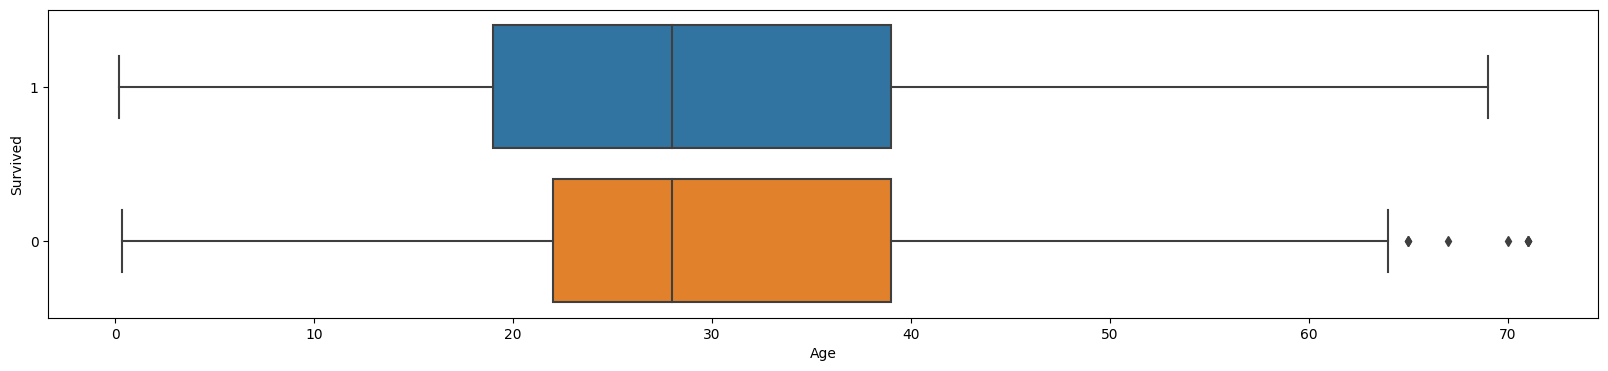

In [12]:
plt.subplots(figsize=(20,4))
df.Survived = df.Survived.astype('str')
ax = sns.boxplot(x="Age", y="Survived", data=df)
df.Survived = df.Survived.astype('int64')
df.dtypes

In [13]:
df_Titanic.head()

Unnamed: 0                                           Name PClass    Age  \
0           1                   Allen, Miss Elisabeth Walton    1st  29.00   
1           2                    Allison, Miss Helen Loraine    1st   2.00   
2           3            Allison, Mr Hudson Joshua Creighton    1st  30.00   
3           4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
4           5                  Allison, Master Hudson Trevor    1st   0.92   

      Sex  Survived  SexCode  
0  female         1        1  
1  female         0        1  
2    male         0        0  
3  female         0        1  
4    male         1        0

## Echantillonnage

On crée un objet **X** avec les variables explicatives

In [15]:
X = df_Titanic[['PClass','Age','Sex']]


Python ne sait pas gérer les variables qualitatives (tout comme la plupart des algorithmes de machine learning), on effectue donc un codage disjonctif complet

In [16]:
X  = pd.get_dummies(data=X, columns=['PClass', 'Sex'])
X

Age  PClass_1st  PClass_2nd  PClass_3rd  Sex_female  Sex_male
0     29.00           1           0           0           1         0
1      2.00           1           0           0           1         0
2     30.00           1           0           0           0         1
3     25.00           1           0           0           1         0
4      0.92           1           0           0           0         1
...     ...         ...         ...         ...         ...       ...
1308  27.00           0           0           1           0         1
1309  26.00           0           0           1           0         1
1310  22.00           0           0           1           0         1
1311  24.00           0           0           1           0         1
1312  29.00           0           0           1           0         1

[1313 rows x 6 columns]

On vérifie les dimensions

In [17]:
X.shape

(1313, 6)

On crée un objet **Y** avec la variable à expliquer

In [18]:
Y = df_Titanic.Survived

On regarde la répartition des classes à prédire

In [19]:
Y.value_counts(normalize=True)

0    0.657273
1    0.342727
Name: Survived, dtype: float64

On scinde l'échantillon en train / test

In [20]:
def salut():
  i = 1
  j = 2
  k = 3
  return i, j, k

In [21]:
a, b, c = salut()

In [24]:
c

3

In [30]:
from sklearn.model_selection import train_test_split
#70% des données pour l’apprentissage
#30% des données pour l'échantillon test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    stratify = Y,
                                                    random_state = 42)

In [31]:
y_test.value_counts(normalize=True)

0    0.65736
1    0.34264
Name: Survived, dtype: float64

In [32]:
y_train.value_counts(normalize=True)

0    0.657236
1    0.342764
Name: Survived, dtype: float64

On affiche un extrait de *X_train*

In [33]:
print(X_train.shape)
X_train.head()

(919, 6)


Age  PClass_1st  PClass_2nd  PClass_3rd  Sex_female  Sex_male
33    41.0           1           0           0           0         1
924   24.0           0           0           1           0         1
1260   NaN           0           0           1           0         1
1125   NaN           0           0           1           0         1
404    NaN           0           1           0           1         0

On remarque des valeurs manquantes dans *X_train*.

In [ ]:
X_train.Age.isna().value_counts()

False    527
True     392
Name: Age, dtype: int64

Pour ne pas supprimer les lignes concernées, on remplace la valeurs manquante par la moyenne de l'échantillon

In [40]:
X_train.Age.fillna(X_train.Age.mean(), inplace=True)

Il n' y a plus de valeurs manquantes

In [ ]:
X_train.Age.isna().value_counts()

False    919
Name: Age, dtype: int64

In [ ]:
print(X_train.shape)
X_train.head()

(919, 6)


Age  PClass_1st  PClass_2nd  PClass_3rd  Sex_female  Sex_male
33    41.000000           1           0           0           0         1
924   24.000000           0           0           1           0         1
1260  30.841708           0           0           1           0         1
1125  30.841708           0           0           1           0         1
404   30.841708           0           1           0           1         0

On affiche un extrait de *X_test*.

In [ ]:
print(X_test.shape)
X_test.head()

(394, 6)


Age  PClass_1st  PClass_2nd  PClass_3rd  Sex_female  Sex_male
961   21.0           0           0           1           1         0
1164   NaN           0           0           1           0         1
398    NaN           0           1           0           1         0
477   22.0           0           1           0           1         0
1291  51.0           0           0           1           0         1

Pour effectuer les prédictions, on gère les valeurs manquantes de l'échantillon test

In [35]:
X_test.Age.fillna(X_test.Age.mean(), inplace=True)

On vérifie que les échantillons soient bien statifiés.

In [36]:
print(y_train.shape)
y_train.value_counts(normalize=True)

(919,)


0    0.657236
1    0.342764
Name: Survived, dtype: float64

In [37]:
print(y_test.shape)
y_test.value_counts(normalize=True)

(394,)


0    0.65736
1    0.34264
Name: Survived, dtype: float64

## Arbre de décision

### Apprentissage

Chargement des librairies pour l'arbre de décision

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

On lance l'apprentissage du modèle sur l'échantillon d'entrainement

In [45]:
model_1 = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=10, min_samples_split=20)
model_1 = model_1.fit(X_train,y_train)

On affiche l'arbre de décision

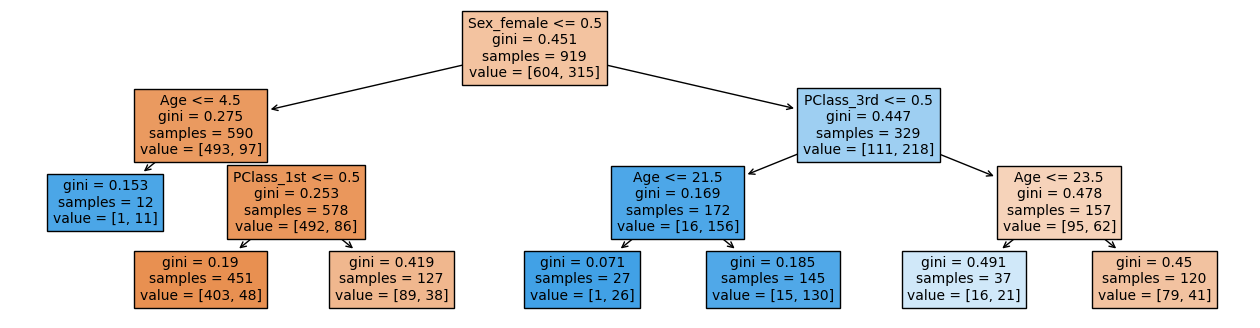

In [46]:
plt.figure(figsize=(16,4))
plot_tree(model_1,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

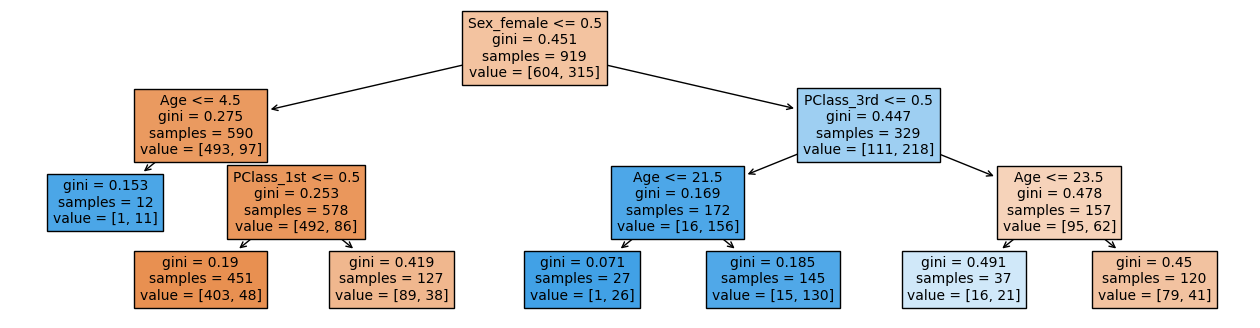

In [47]:
plt.figure(figsize=(16,4))
plot_tree(model_1,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

### Prédiction

On deploie le modèle sur l'échantillon test avec la méthode *predict()*

In [51]:
y_pred = model_1.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

On peut aussi extraire les probabilités(ou proportion) avec la méthode *predict_proba()* <br>
⚠ Dans une arbre de décision, *predict_proba()* ne renvoie pas une réelle probabilité mais plutôt la proportion des classes du sous ensemble auquel appartient l'instance.

In [49]:
y_pred_proba = model_1.predict_proba(X_test)
y_pred_proba[0:10]

array([[0.43243243, 0.56756757],
       [0.89356984, 0.10643016],
       [0.10344828, 0.89655172],
       [0.10344828, 0.89655172],
       [0.89356984, 0.10643016],
       [0.43243243, 0.56756757],
       [0.89356984, 0.10643016],
       [0.10344828, 0.89655172],
       [0.7007874 , 0.2992126 ],
       [0.10344828, 0.89655172]])

### Evaluation du modèle

On calcule la matrice de confusion

In [52]:
from sklearn.metrics import confusion_matrix
mc = pd.DataFrame(confusion_matrix(y_test,y_pred),
                  columns=['pred_0','pred_1'],
                  index=['obs_0','obs_1'])

mc

pred_0  pred_1
obs_0     237      22
obs_1      50      85

On peut aussi la calculer avec la méthode *pd.crosstab()*

In [53]:
pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

pred    0    1  All
obs                
0     237   22  259
1      50   85  135
All   287  107  394

On calcule le taux de succès du modèle

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.817258883248731


#### Approche binaire

📢 Cette approche consiste à calculer les métriques que d'une seule classe

On calcule d'autres métriques sur la classe des négatifs (0)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("succes : " + str(accuracy_score(y_test,y_pred)))
print('recall :' + str(recall_score(y_test,y_pred,average='binary', pos_label=0)))
print('precision : ' + str(precision_score(y_test,y_pred, average='binary', pos_label=0)))
print('f1_score :' + str(f1_score(y_test,y_pred, average='binary', pos_label=0)))

print('\nAvec les calculs à la 🖐🏻:\n')
r0 = 253/259
p0 = 253/316
f1_0 = (2*(r0*p0) ) / (r0+p0)


print("recall : " + str(r0))
print("precision : " + str(p0))
print("f1_score : " + str(f1_0))

succes : 0.817258883248731
recall :0.915057915057915
precision : 0.8257839721254355
f1_score :0.8681318681318682

Avec les calculs à la 🖐🏻:

recall : 0.9768339768339769
precision : 0.8006329113924051
f1_score : 0.8800000000000001


On calcule d'autres métriques sur la classe des positifs (1)

In [ ]:
print('recall : ' + str(recall_score(y_test,y_pred,average='binary', pos_label=1)))
print('precision : ' + str(precision_score(y_test,y_pred, average='binary', pos_label=1)))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='binary', pos_label=1)))

print('\nAvec les calculs à la 🖐🏻:\n')
r1 = 72/135
p1 = 72/78
f1_1 = (2*(r1*p1) ) / (r1+p1)

print("recall : " + str(r1))
print("precision : " + str(p1))
print("f1_score : " + str(f1_1))

recall : 0.6296296296296297
precision : 0.794392523364486
f1_score : 0.7024793388429753

Avec les calculs à la 🖐🏻:

recall : 0.5333333333333333
precision : 0.9230769230769231
f1_score : 0.676056338028169


#### Approche macro

📢 Cette approche consiste à calculer la moyenne des métriques de chaque classe

In [ ]:
print('recall : ' + str(recall_score(y_test,y_pred,average='macro')))
print('precision : ' + str(precision_score(y_test,y_pred, average='macro')))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

from statistics import mean

print('\nAvec les calculs à la 🖐🏻:\n')
print("recall : " + str(mean([r0,r1])))
print("precision : " + str(mean([p0,p1])))
print("f1_score : " + str(mean([f1_0,f1_1])))

recall : 0.7723437723437723
precision : 0.8100882477449607
f1_score : 0.7853056034874217

Avec les calculs à la 🖐🏻:

recall : 0.755083655083655
precision : 0.8618549172346641
f1_score : 0.7780281690140846


#### Approche pondérée

📢 Cette approche consiste à calculer les métriques en pondérant par l'effectif réel de chaque classe

In [ ]:
print('recall : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('precision : ' + str(precision_score(y_test,y_pred, average='weighted')))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='weighted')))

print('\nAvec les calculs à la 🖐🏻:\n')

weighted_0 = confusion_matrix(y_test,y_pred).sum(axis = 1)[0]
weighted_1 = confusion_matrix(y_test,y_pred).sum(axis = 1)[1]
n = confusion_matrix(y_test,y_pred).sum()
recall_weighted = ((weighted_0 * r0) + (weighted_1 * r1)) / n
precision_weighted = ((weighted_0 * p0) + (weighted_1 * p1)) / n
f1_weighted = (f1_0*weighted_0 + f1_1*weighted_1) / n

print("recall : " + str(recall_weighted))
print("precision : " + str(precision_weighted))
print("f1_score : " + str(f1_weighted))

recall : 0.817258883248731
precision : 0.8150280188697802
f1_score : 0.8113727527663845

Avec les calculs à la 🖐🏻:

recall : 0.8248730964467005
precision : 0.842587077832532
f1_score : 0.8101208264817331


#### Approche micro

📢 Cette approche consiste à calculer les métriques sans tenir compte des classes

In [ ]:
print('recall :' + str(recall_score(y_test,y_pred,average='micro')))
print('precision :' + str(precision_score(y_test,y_pred, average='micro')))
print('f1_score :' + str(f1_score(y_test,y_pred, average='micro')))

print('\nAvec les calculs à la 🖐🏻:\n')

micro = confusion_matrix(y_test,y_pred).diagonal().sum() / confusion_matrix(y_test,y_pred).sum()
print("Micro : " + str(micro))

recall :0.817258883248731
precision :0.817258883248731
f1_score :0.817258883248731

Avec les calculs à la 🖐🏻:

Micro : 0.817258883248731


### Optimisation des paramètres du modèle

#### Sans validation croisée

Pour cela on utilise la méthode *GridSearchCV()*. Par défaut, *GridSearchCV()* effectue une validation croisée. Pour faire un grid search uniquement avec l'approche *train/test*, on utilise la méthode *ShuffleSplit()*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

On lance l'optimisation des paramètres pour obtenir le meilleure modèle

In [55]:
parameters = {'max_depth' : [1,2,3,4,5,6] ,
              'min_samples_leaf' : [10,20,30,40],
              'min_samples_split' : [50,100,200]}

dtc = DecisionTreeClassifier()
dtc_model_1 = GridSearchCV(dtc, parameters, scoring = 'accuracy' ,
                   cv = ShuffleSplit(test_size=0.30, n_splits=1, random_state=0))
dtc_model_1.fit(X_train, y_train )

print("Voici les paramètres du meilleure modèle : " + str(dtc_model_1.best_estimator_))
print("Voici le score "  + str(dtc_model_1.scorer_) + " du meilleure modèle : " + str(dtc_model_1.best_score_))

Voici les paramètres du meilleure modèle : DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=50)
Voici le score make_scorer(accuracy_score) du meilleure modèle : 0.822463768115942


On affiche le meilleure arbre de décision

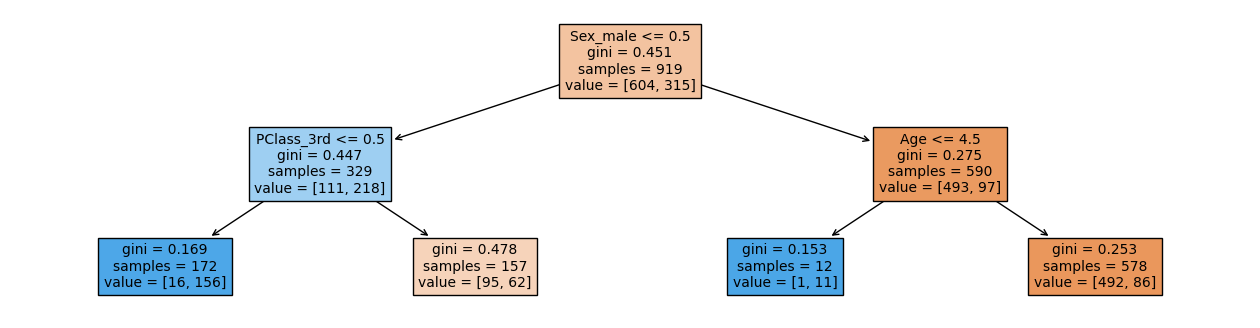

In [56]:
plt.figure(figsize=(16,4))
plot_tree(dtc_model_1.best_estimator_,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

Prédiction sur l'échantillon test

In [ ]:
y_pred = dtc_model_1.predict(X_test)
print("succes :" + str(accuracy_score(y_test,y_pred)))

succes :0.8350253807106599


⚠ Jusqu'ici, on évalue les modèles avec le <font color=red> taux de succès (accuracy score) </font>. L'objectif principal est de construire un modèle qui permet d'identifier les survivants. On doit donc changer de métrique et utiliser <font color=red> le f1_score de la classe des survivants </font>. Pour cela, on utilise la méthode *make_scorer()*

In [ ]:
from sklearn.metrics import make_scorer
parameters = {'max_depth' : [1,2,3,4,5,6] ,
              'min_samples_leaf' : [10,20,30,40],
              'min_samples_split' : [50,100,200]}

dtc = DecisionTreeClassifier()

#On utilise le recall_score de la classe survivant
score = make_scorer(f1_score, pos_label=1)
dtc_model_1 = GridSearchCV(dtc, parameters, scoring = score,
                           cv = ShuffleSplit(test_size=0.30, n_splits=1, random_state=0))
dtc_model_1.fit(X_train, y_train )

print("Voici les paramètres du meilleure modèle : " + str(dtc_model_1.best_estimator_))
print("Voici le "  + str(dtc_model_1.scorer_) + " du meilleure modèle : " + str(dtc_model_1.best_score_))

Voici les paramètres du meilleure modèle : DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=50)
Voici le make_scorer(f1_score, pos_label=1) du meilleure modèle : 0.6829268292682926


On affiche le meilleure arbre de décision

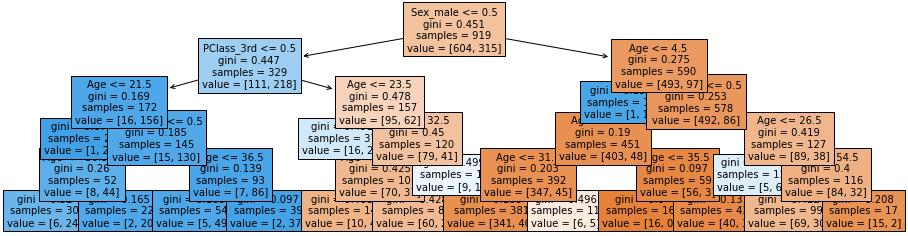

In [ ]:
plt.figure(figsize=(16,4))
plot_tree(dtc_model_1.best_estimator_,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

Affichage des métriques et de la matrice de confusion

In [57]:
y_pred = dtc_model_1.predict(X_test)
print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))
pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.7031963470319634


pred    0   1  All
obs               
0     252   7  259
1      58  77  135
All   310  84  394

#### 📢 Nombre de combinaison dans le GridSearch

⚠ Trop de combinaison à tester dans un GridSearch peut considérablement augmenter le temps de traitement de la recherche des meilleurs paramètres. Cette fonction calcule le nombre de combinaison que votre GridSearch s'apprête à faire.

In [ ]:
def alerteCombinaison(dictionary_param):

    from numpy import prod
    lengths = [len(v) for v in parameters.values()]
    count = prod(lengths)
    if count < 500:
        print("C'est bon tu peux envoyer l'apprentissage !")
    elif count < 1000:
        print("Tu peux lire tes mails pendant l'apprentissage !")
    elif count < 2000:
        print("Tu peux répondre à tes mails pendant l'apprentissage !")
    else:
        print("Tu peux mettre ton PC en veille et revenir demain !")

    print("Nombre de combinaison :")
    return(count)

#### Avec validation croisée

On choisit les paramètres à tester dans le GridSearch

In [ ]:
#cette fois-ci on utilise numpy pour générer des séquences à la place des listes
parameters = {'max_depth' : np.arange(start = 1, stop = 10, step = 1) ,
              'min_samples_leaf' : np.arange(start = 5, stop = 250, step = 50),
              'min_samples_split' : np.arange(start = 10, stop = 500, step = 50)}

print(alerteCombinaison(parameters))

C'est bon tu peux envoyer l'apprentissage !
Nombre de combinaison :
450


In [ ]:
from sklearn.metrics import make_scorer

dtc = DecisionTreeClassifier()

score = make_scorer(f1_score, pos_label=1)
dtc_model_2 = GridSearchCV(dtc, parameters, scoring = score, verbose = 2, cv = 5)
dtc_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=60 ...........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=60, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=60 .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=1, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=260 ..........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=260, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=260 ..........
[CV]  max_depth=1, min_samples_leaf=5, min_samples_split=260, total=   0.0s
[CV] max_depth=1, min_samples_leaf=5, min_samples_split=260 ..........
[CV]  max_depth=1, min_samples_leaf=5, min_sam

[CV]  max_depth=1, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=1, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=1, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=1, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=1, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=1, min_samples_leaf=55, min_samples_split=310 .........
[CV]  max_depth=1, min_samples_leaf=55, min_samples_split=310, total=   0.0s
[CV] max_depth=1, min_samples_leaf=55, min_samples_split=310 .........
[CV]  max_depth=1, min_samples_leaf=55, min_samples_split=310, total=   0.0s
[CV] max_depth=1, min_samples_leaf=55, min_samples_split=310 .........
[CV]  max_depth=1, min_samples_leaf=55, min_samples_split=310, total=   0.0s
[CV] max_depth=1, min_samples_leaf=55, min_samples_split=310 .........
[CV]  max_depth=1, min_samples_leaf=55, min_samples_split=310, total=   0.0s
[CV] max_depth=1, min_samples_leaf=

[CV]  max_depth=1, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=1, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=1, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=1, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=1, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=1, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=1, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=1, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=1, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=1, min_samples_leaf=105, min_samples_split=410 ........
[CV]  max_depth=1, min_samples_leaf=105, min_samples_split=410, total=   0.0s
[CV] max_depth=1, min_samples_leaf=105, min_samples_split=410 ........
[CV]  max_depth=1, min_samples_leaf=105, min_samples_split=410, total=   0.0s
[CV] max_depth=1, min_sample

[CV]  max_depth=1, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=1, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=1, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=1, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=1, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=1, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=1, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=1, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=1, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=1, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=1, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=1, min_samples_leaf=205, min_samples_split=10 .........
[CV]  max_depth=1, min_samples_leaf=205, min_samples_split=10, total=   0.0s
[CV] max_depth=1, min_samples

[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=60 ...........
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=60, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=60 ...........
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=60, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples

[CV]  max_depth=2, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=2, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=2, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=2, min_samples_leaf=55, min_samples_split=110 .........
[CV]  max_depth=2, min_samples_leaf=55, min_samples_split=110, total=   0.0s
[CV] max_depth=2, min_samples_leaf=55, min_samples_split=110 .........
[CV]  max_depth=2, min_samples_leaf=55, min_samples_split=110, total=   0.0s
[CV] max_depth=2, min_samples_leaf=55, min_samples_split=110 .........
[CV]  max_depth=2, min_samples_leaf=55, min_samples_split=110, total=   0.0s
[CV] max_depth=2, min_samples_leaf=55, min_samples_split=110 .........
[CV]  max_depth=2, min_samples_leaf=55, min_samples_split=110, total=   0.0s
[CV] max_depth=2, min_samples_leaf=55, min_samples_split=110 .........
[CV]  max_depth=2, min_samples_leaf=55, min_samples_split=110, total=   0.0s
[CV] max_depth=2, min_samples_leaf=55

[CV]  max_depth=2, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=2, min_samples_leaf=105, min_samples_split=160 ........
[CV]  max_depth=2, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=2, min_samples_leaf=105, min_samples_split=160 ........
[CV]  max_depth=2, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=2, min_samples_leaf=105, min_samples_split=160 ........
[CV]  max_depth=2, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=2, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=2, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=2, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=2, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=2, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=2, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=2, min_sample

[CV]  max_depth=2, min_samples_leaf=205, min_samples_split=310, total=   0.0s
[CV] max_depth=2, min_samples_leaf=205, min_samples_split=310 ........
[CV]  max_depth=2, min_samples_leaf=205, min_samples_split=310, total=   0.0s
[CV] max_depth=2, min_samples_leaf=205, min_samples_split=310 ........
[CV]  max_depth=2, min_samples_leaf=205, min_samples_split=310, total=   0.0s
[CV] max_depth=2, min_samples_leaf=205, min_samples_split=310 ........
[CV]  max_depth=2, min_samples_leaf=205, min_samples_split=310, total=   0.0s
[CV] max_depth=2, min_samples_leaf=205, min_samples_split=310 ........
[CV]  max_depth=2, min_samples_leaf=205, min_samples_split=310, total=   0.0s
[CV] max_depth=2, min_samples_leaf=205, min_samples_split=360 ........
[CV]  max_depth=2, min_samples_leaf=205, min_samples_split=360, total=   0.0s
[CV] max_depth=2, min_samples_leaf=205, min_samples_split=360 ........
[CV]  max_depth=2, min_samples_leaf=205, min_samples_split=360, total=   0.0s
[CV] max_depth=2, min_sample

[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=410 ..........
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=410, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=410 ..........
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=410, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=410 ..........
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=410, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=410 ..........
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=410, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, min_samples_split=410 ..........
[CV]  max_depth=3, min_samples_leaf=5, min_samples_split=410, total=   0.0s
[CV] max_depth=3, min_samples_leaf=5, min_

[CV]  max_depth=3, min_samples_leaf=105, min_samples_split=10, total=   0.0s
[CV] max_depth=3, min_samples_leaf=105, min_samples_split=10 .........
[CV]  max_depth=3, min_samples_leaf=105, min_samples_split=10, total=   0.0s
[CV] max_depth=3, min_samples_leaf=105, min_samples_split=10 .........
[CV]  max_depth=3, min_samples_leaf=105, min_samples_split=10, total=   0.0s
[CV] max_depth=3, min_samples_leaf=105, min_samples_split=10 .........
[CV]  max_depth=3, min_samples_leaf=105, min_samples_split=10, total=   0.0s
[CV] max_depth=3, min_samples_leaf=105, min_samples_split=10 .........
[CV]  max_depth=3, min_samples_leaf=105, min_samples_split=10, total=   0.0s
[CV] max_depth=3, min_samples_leaf=105, min_samples_split=60 .........
[CV]  max_depth=3, min_samples_leaf=105, min_samples_split=60, total=   0.0s
[CV] max_depth=3, min_samples_leaf=105, min_samples_split=60 .........
[CV]  max_depth=3, min_samples_leaf=105, min_samples_split=60, total=   0.0s
[CV] max_depth=3, min_samples_leaf=

[CV]  max_depth=3, min_samples_leaf=155, min_samples_split=110, total=   0.0s
[CV] max_depth=3, min_samples_leaf=155, min_samples_split=110 ........
[CV]  max_depth=3, min_samples_leaf=155, min_samples_split=110, total=   0.0s
[CV] max_depth=3, min_samples_leaf=155, min_samples_split=160 ........
[CV]  max_depth=3, min_samples_leaf=155, min_samples_split=160, total=   0.0s
[CV] max_depth=3, min_samples_leaf=155, min_samples_split=160 ........
[CV]  max_depth=3, min_samples_leaf=155, min_samples_split=160, total=   0.0s
[CV] max_depth=3, min_samples_leaf=155, min_samples_split=160 ........
[CV]  max_depth=3, min_samples_leaf=155, min_samples_split=160, total=   0.0s
[CV] max_depth=3, min_samples_leaf=155, min_samples_split=160 ........
[CV]  max_depth=3, min_samples_leaf=155, min_samples_split=160, total=   0.0s
[CV] max_depth=3, min_samples_leaf=155, min_samples_split=160 ........
[CV]  max_depth=3, min_samples_leaf=155, min_samples_split=160, total=   0.0s
[CV] max_depth=3, min_sample

[CV]  max_depth=3, min_samples_leaf=205, min_samples_split=210, total=   0.0s
[CV] max_depth=3, min_samples_leaf=205, min_samples_split=210 ........
[CV]  max_depth=3, min_samples_leaf=205, min_samples_split=210, total=   0.0s
[CV] max_depth=3, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=3, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=3, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=3, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=3, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=3, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=3, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=3, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=3, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=3, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=3, min_sample

[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=310, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=310 ..........
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=310, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_

[CV]  max_depth=4, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=4, min_samples_leaf=55, min_samples_split=410 .........
[CV]  max_depth=4, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=4, min_samples_leaf=55, min_samples_split=410 .........
[CV]  max_depth=4, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=4, min_samples_leaf=55, min_samples_split=410 .........
[CV]  max_depth=4, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=4, min_samples_leaf=55, min_samples_split=410 .........
[CV]  max_depth=4, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=4, min_samples_leaf=55, min_samples_split=460 .........
[CV]  max_depth=4, min_samples_leaf=55, min_samples_split=460, total=   0.0s
[CV] max_depth=4, min_samples_leaf=55, min_samples_split=460 .........
[CV]  max_depth=4, min_samples_leaf=55, min_samples_split=460, total=   0.0s
[CV] max_depth=4, min_samples_leaf=

[CV]  max_depth=4, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=4, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=4, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=4, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=4, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=155, min_samples_split=60 .........
[CV]  max_depth=4, min_samples_leaf=155, min_samples_split=60, total=   0.0s
[CV] max_depth=4, min_samples_leaf=155, min_samples_split=60 .........
[CV]  max_depth=4, min_samples_leaf=155, min_samples_split=60, total=   0.0s
[CV] max_depth=4, min_samples_leaf=

[CV]  max_depth=4, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=4, min_samples_leaf=205, min_samples_split=60 .........
[CV]  max_depth=4, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=4, min_samples_leaf=205, min_samples_split=60 .........
[CV]  max_depth=4, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=4, min_samples_leaf=205, min_samples_split=110 ........
[CV]  max_depth=4, min_samples_leaf=205, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_leaf=205, min_samples_split=110 ........
[CV]  max_depth=4, min_samples_leaf=205, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_leaf=205, min_samples_split=110 ........
[CV]  max_depth=4, min_samples_leaf=205, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_leaf=205, min_samples_split=110 ........
[CV]  max_depth=4, min_samples_leaf=205, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_l

[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=160, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=160 ..........
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=160, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=160 ..........
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=160, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_

[CV]  max_depth=5, min_samples_leaf=55, min_samples_split=210, total=   0.0s
[CV] max_depth=5, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=5, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=5, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=5, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=5, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=5, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=5, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=5, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=5, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=5, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=5, min_samples_leaf=55, min_samples_split=310 .........
[CV]  max_depth=5, min_samples_leaf=55, min_samples_split=310, total=   0.0s
[CV] max_depth=5, min_samples_leaf=

[CV]  max_depth=5, min_samples_leaf=105, min_samples_split=310, total=   0.0s
[CV] max_depth=5, min_samples_leaf=105, min_samples_split=310 ........
[CV]  max_depth=5, min_samples_leaf=105, min_samples_split=310, total=   0.0s
[CV] max_depth=5, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=5, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=5, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=5, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=5, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=5, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=5, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=5, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=5, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=5, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=5, min_sample

[CV]  max_depth=5, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=5, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=5, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=5, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=5, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=5, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=5, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=5, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=5, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=5, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=5, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=5, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=5, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=5, min_sample

[CV]  max_depth=5, min_samples_leaf=205, min_samples_split=460, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=60 ...........
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=60, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samp

[CV]  max_depth=6, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=6, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=6, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=6, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=6, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=6, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=6, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=6, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=6, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=6, min_samples_leaf=55, min_samples_split=110 .........
[CV]  max_depth=6, min_samples_leaf=55, min_samples_split=110, total=   0.0s
[CV] max_depth=6, min_samples_leaf=55, min_samples_split=110 .........
[CV]  max_depth=6, min_samples_leaf=55, min_samples_split=110, total=   0.0s
[CV] max_depth=6, min_samples_leaf=55, m

[CV]  max_depth=6, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=6, min_samples_leaf=105, min_samples_split=160 ........
[CV]  max_depth=6, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=6, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=6, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=6, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=6, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=6, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=6, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=6, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=6, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=6, min_samples_leaf=105, min_samples_split=210 ........
[CV]  max_depth=6, min_samples_leaf=105, min_samples_split=210, total=   0.0s
[CV] max_depth=6, min_sample

[CV]  max_depth=6, min_samples_leaf=155, min_samples_split=310, total=   0.0s
[CV] max_depth=6, min_samples_leaf=155, min_samples_split=360 ........
[CV]  max_depth=6, min_samples_leaf=155, min_samples_split=360, total=   0.0s
[CV] max_depth=6, min_samples_leaf=155, min_samples_split=360 ........
[CV]  max_depth=6, min_samples_leaf=155, min_samples_split=360, total=   0.0s
[CV] max_depth=6, min_samples_leaf=155, min_samples_split=360 ........
[CV]  max_depth=6, min_samples_leaf=155, min_samples_split=360, total=   0.0s
[CV] max_depth=6, min_samples_leaf=155, min_samples_split=360 ........
[CV]  max_depth=6, min_samples_leaf=155, min_samples_split=360, total=   0.0s
[CV] max_depth=6, min_samples_leaf=155, min_samples_split=360 ........
[CV]  max_depth=6, min_samples_leaf=155, min_samples_split=360, total=   0.0s
[CV] max_depth=6, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=6, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=6, min_sample

[CV]  max_depth=6, min_samples_leaf=205, min_samples_split=410, total=   0.0s
[CV] max_depth=6, min_samples_leaf=205, min_samples_split=410 ........
[CV]  max_depth=6, min_samples_leaf=205, min_samples_split=410, total=   0.0s
[CV] max_depth=6, min_samples_leaf=205, min_samples_split=460 ........
[CV]  max_depth=6, min_samples_leaf=205, min_samples_split=460, total=   0.0s
[CV] max_depth=6, min_samples_leaf=205, min_samples_split=460 ........
[CV]  max_depth=6, min_samples_leaf=205, min_samples_split=460, total=   0.0s
[CV] max_depth=6, min_samples_leaf=205, min_samples_split=460 ........
[CV]  max_depth=6, min_samples_leaf=205, min_samples_split=460, total=   0.0s
[CV] max_depth=6, min_samples_leaf=205, min_samples_split=460 ........
[CV]  max_depth=6, min_samples_leaf=205, min_samples_split=460, total=   0.0s
[CV] max_depth=6, min_samples_leaf=205, min_samples_split=460 ........
[CV]  max_depth=6, min_samples_leaf=205, min_samples_split=460, total=   0.0s
[CV] max_depth=7, min_sample

[CV]  max_depth=7, min_samples_leaf=55, min_samples_split=10, total=   0.0s
[CV] max_depth=7, min_samples_leaf=55, min_samples_split=10 ..........
[CV]  max_depth=7, min_samples_leaf=55, min_samples_split=10, total=   0.0s
[CV] max_depth=7, min_samples_leaf=55, min_samples_split=10 ..........
[CV]  max_depth=7, min_samples_leaf=55, min_samples_split=10, total=   0.0s
[CV] max_depth=7, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=7, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=7, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=7, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=7, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=7, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=7, min_samples_leaf=55, min_samples_split=60 ..........
[CV]  max_depth=7, min_samples_leaf=55, min_samples_split=60, total=   0.0s
[CV] max_depth=7, min_samples_leaf=55, min

[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=110, total=   0.0s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=110 ........
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=110, total=   0.0s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=110 ........
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=110, total=   0.0s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=110 ........
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=110, total=   0.0s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=160 ........
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=160 ........
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=160 ........
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=160, total=   0.0s
[CV] max_depth=7, min_sample

[CV]  max_depth=7, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=7, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=7, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=7, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=7, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=7, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=7, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=7, min_samples_leaf=205, min_samples_split=260 ........
[CV]  max_depth=7, min_samples_leaf=205, min_samples_split=260, total=   0.0s
[CV] max_depth=7, min_samples_leaf=205, min_samples_split=310 ........
[CV]  max_depth=7, min_samples_leaf=205, min_samples_split=310, total=   0.0s
[CV] max_depth=7, min_samples_leaf=205, min_samples_split=310 ........
[CV]  max_depth=7, min_samples_leaf=205, min_samples_split=310, total=   0.0s
[CV] max_depth=7, min_sample

[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=310, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=310 ..........
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=310, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=310 ..........
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=310, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=360 ..........
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=360, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_

[CV]  max_depth=8, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=8, min_samples_leaf=55, min_samples_split=410 .........
[CV]  max_depth=8, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=8, min_samples_leaf=55, min_samples_split=410 .........
[CV]  max_depth=8, min_samples_leaf=55, min_samples_split=410, total=   0.0s
[CV] max_depth=8, min_samples_leaf=55, min_samples_split=460 .........
[CV]  max_depth=8, min_samples_leaf=55, min_samples_split=460, total=   0.0s
[CV] max_depth=8, min_samples_leaf=55, min_samples_split=460 .........
[CV]  max_depth=8, min_samples_leaf=55, min_samples_split=460, total=   0.0s
[CV] max_depth=8, min_samples_leaf=55, min_samples_split=460 .........
[CV]  max_depth=8, min_samples_leaf=55, min_samples_split=460, total=   0.0s
[CV] max_depth=8, min_samples_leaf=55, min_samples_split=460 .........
[CV]  max_depth=8, min_samples_leaf=55, min_samples_split=460, total=   0.0s
[CV] max_depth=8, min_samples_leaf=

[CV]  max_depth=8, min_samples_leaf=105, min_samples_split=460, total=   0.0s
[CV] max_depth=8, min_samples_leaf=105, min_samples_split=460 ........
[CV]  max_depth=8, min_samples_leaf=105, min_samples_split=460, total=   0.0s
[CV] max_depth=8, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=8, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=8, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=8, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=8, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=155, min_samples_split=10 .........
[CV]  max_depth=8, min_samples_leaf=155, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_lea

[CV]  max_depth=8, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=8, min_samples_leaf=205, min_samples_split=60 .........
[CV]  max_depth=8, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=8, min_samples_leaf=205, min_samples_split=60 .........
[CV]  max_depth=8, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=8, min_samples_leaf=205, min_samples_split=60 .........
[CV]  max_depth=8, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=8, min_samples_leaf=205, min_samples_split=60 .........
[CV]  max_depth=8, min_samples_leaf=205, min_samples_split=60, total=   0.0s
[CV] max_depth=8, min_samples_leaf=205, min_samples_split=110 ........
[CV]  max_depth=8, min_samples_leaf=205, min_samples_split=110, total=   0.0s
[CV] max_depth=8, min_samples_leaf=205, min_samples_split=110 ........
[CV]  max_depth=8, min_samples_leaf=205, min_samples_split=110, total=   0.0s
[CV] max_depth=8, min_samples_lea

[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=160, total=   0.0s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=160 ..........
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=160, total=   0.0s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=9, min_samples_leaf=5, min_samples_split=210 ..........
[CV]  max_depth=9, min_samples_leaf=5, min_samples_split=210, total=   0.0s
[CV] max_depth=9, min_samples_leaf=5, min_

[CV]  max_depth=9, min_samples_leaf=55, min_samples_split=210, total=   0.0s
[CV] max_depth=9, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=9, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=9, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=9, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=9, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=9, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=9, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=9, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=9, min_samples_leaf=55, min_samples_split=260 .........
[CV]  max_depth=9, min_samples_leaf=55, min_samples_split=260, total=   0.0s
[CV] max_depth=9, min_samples_leaf=55, min_samples_split=310 .........
[CV]  max_depth=9, min_samples_leaf=55, min_samples_split=310, total=   0.0s
[CV] max_depth=9, min_samples_leaf=

[CV]  max_depth=9, min_samples_leaf=105, min_samples_split=310, total=   0.0s
[CV] max_depth=9, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=9, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=9, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=9, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=9, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=9, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=9, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=9, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=9, min_samples_leaf=105, min_samples_split=360 ........
[CV]  max_depth=9, min_samples_leaf=105, min_samples_split=360, total=   0.0s
[CV] max_depth=9, min_samples_leaf=105, min_samples_split=410 ........
[CV]  max_depth=9, min_samples_leaf=105, min_samples_split=410, total=   0.0s
[CV] max_depth=9, min_sample

[CV]  max_depth=9, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=9, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=9, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=9, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=9, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=9, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=9, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=9, min_samples_leaf=155, min_samples_split=410 ........
[CV]  max_depth=9, min_samples_leaf=155, min_samples_split=410, total=   0.0s
[CV] max_depth=9, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=9, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=9, min_samples_leaf=155, min_samples_split=460 ........
[CV]  max_depth=9, min_samples_leaf=155, min_samples_split=460, total=   0.0s
[CV] max_depth=9, min_sample

[CV]  max_depth=9, min_samples_leaf=205, min_samples_split=460, total=   0.0s
[CV] max_depth=9, min_samples_leaf=205, min_samples_split=460 ........
[CV]  max_depth=9, min_samples_leaf=205, min_samples_split=460, total=   0.0s


[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:   19.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([  5,  55, 105, 155, 205]),
                         'min_samples_split': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             scoring=make_scorer(f1_score, pos_label=1), verbose=2)

In [ ]:
print("Voici les paramètres du meilleure modèle : " + str(dtc_model_2.best_estimator_))
print("Voici le "  + str(dtc_model_2.scorer_) + " du meilleure modèle : " + str(dtc_model_2.best_score_))

Voici les paramètres du meilleure modèle : DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=310)
Voici le make_scorer(f1_score, pos_label=1) du meilleure modèle : 0.6941197399118085


In [ ]:
y_pred = dtc_model_2.predict(X_test)
print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))
pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.7031963470319634


pred    0   1  All
obs               
0     252   7  259
1      58  77  135
All   310  84  394

In [ ]:
y_pred[0:4]

array([0, 0, 1, 1], dtype=int64)

In [ ]:
dtc_model_2.predict_proba(X_test)

array([[0.60509554, 0.39490446],
       [0.85121107, 0.14878893],
       [0.09302326, 0.90697674],
       [0.09302326, 0.90697674],
       [0.85121107, 0.14878893],
       [0.60509554, 0.39490446],
       [0.85121107, 0.14878893],
       [0.09302326, 0.90697674],
       [0.85121107, 0.14878893],
       [0.09302326, 0.90697674],
       [0.60509554, 0.39490446],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.60509554, 0.39490446],
       [0.60509554, 0.39490446],
       [0.85121107, 0.14878893],
       [0.60509554, 0.39490446],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.85121107, 0.14878893],
       [0.

### Courbe ROC

Fonction pour construire une courbe ROC avec plusieurs modèles

📢 Limiter au nombre de couleurs que propose la palette *bright*  de seaborn <br>
http://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
def print_roc_curv(lst_proba,lst_label,y_test):

    from scipy import interp
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    from seaborn import color_palette
    import itertools

    colors = itertools.cycle(color_palette('bright'))
    cpt=0
    for i in lst_proba:
        probas = i #pour calculer la proba d'appartenance à la classe 0 et à la classe 1 de chaque individu de l'échantillon test
        #print(probas1[:, 1]) #seule la proba d'appartenance à la classe 1 nous intéresse

        # Construction de la courbe ROC et calcul de l'AUC pour un modèle
        fpr, tpr, thresholds = roc_curve(y_test,probas[:, 1]) #fpr = False Positive Rate ; tpr = True Positive Rate
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.8, label=str(lst_label[cpt])+ '(AUC = %0.2f)' % (roc_auc), color=next(colors))
        cpt=cpt+1

    plt.plot([0, 1], [0, 1], linestyle='-', lw=2, color='black',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Comparaison de modèles : courbes ROC')
    plt.legend(loc="lower right")
    plt.figure(figsize=(20,10))
    plt.show()


On ajoute les deux modèles à aux listes pour afficher la courbe ROC

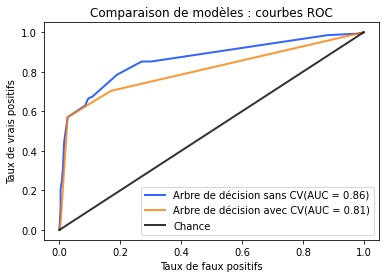

<Figure size 1440x720 with 0 Axes>

In [ ]:
lst_proba = []
lst_label = []

#Model  1
lst_proba.append(dtc_model_1.predict_proba(X_test))
lst_label.append("Arbre de décision sans CV")

#Model  2
lst_proba.append(dtc_model_2.predict_proba(X_test))
lst_label.append("Arbre de décision avec CV")

print_roc_curv(lst_proba,lst_label,y_test)

D'après l'AUC, l'arbre de décision sans validation croisée est le meilleure modèle

### Courbe LIFT

Fonction pour construire une courbe LIFT

In [ ]:
def lift_curve(y_test, ls_probas, pos_label = 0):

    import matplotlib.pyplot as plt

    df = pd.DataFrame(ls_probas)
    df['obs'] = y_test.to_list()
    if pos_label == 0:
        df['obs'] = np.where(df['obs'] == 1,0,1)

    df.sort_values(by = pos_label, ascending = False, inplace = True)
    df['cumsum'] = df.obs.cumsum()
    df['TVP'] = df['cumsum'] / df['cumsum'].max()
    df['abcisse'] = np.arange(0,df.shape[0],step = 1) / (df.shape[0]-1)

    plt.plot(df['abcisse'], df['TVP'],color='black')
    plt.title("LIFT Curve : Pos_label = " + str(pos_label) )
    plt.ylabel('True Positive Rate')
    plt.xlabel('Freq. Cum.')
    plt.show()

    return(df)

On affiche la courbe LIFT avec le premier modèle

In [ ]:
#gerer le nombre de ligne à afficher
pd.set_option("display.min_rows", 300)
res.head(300)

0         1  obs  cumsum       TVP   abcisse
258  0.037037  0.962963    0       0  0.000000  0.000000
284  0.037037  0.962963    1       1  0.007407  0.002545
204  0.037037  0.962963    1       2  0.014815  0.005089
347  0.037037  0.962963    1       3  0.022222  0.007634
223  0.037037  0.962963    1       4  0.029630  0.010178
172  0.037037  0.962963    1       5  0.037037  0.012723
133  0.037037  0.962963    1       6  0.044444  0.015267
340  0.037037  0.962963    1       7  0.051852  0.017812
127  0.037037  0.962963    1       8  0.059259  0.020356
77   0.037037  0.962963    1       9  0.066667  0.022901
219  0.037037  0.962963    1      10  0.074074  0.025445
240  0.037037  0.962963    1      11  0.081481  0.027990
388  0.037037  0.962963    1      12  0.088889  0.030534
390  0.037037  0.962963    1      13  0.096296  0.033079
53   0.037037  0.962963    1      14  0.103704  0.035623
352  0.037037  0.962963    1      15  0.111111  0.038168
315  0.083333  0.916667    1      16  0.118519  0.040712
311  0.083333  0.916667    1      17  0.125926  0.043257
142  0.083333  0.916667    0      17  0.125926  0.045802
85   0.083333  0.916667    1      18  0.133333  0.048346
92   0.083333  0.916667    1      19  0.140741  0.050891
302  0.083333  0.916667    1      20  0.148148  0.053435
227  0.103448  0.896552    0      20  0.148148  0.055980
236  0.103448  0.896552    1      21  0.155556  0.058524
237  0.103448  0.896552    1      22  0.162963  0.061069
57   0.103448  0.896552    1      23  0.170370  0.063613
239  0.103448  0.896552    1      24  0.177778  0.066158
215  0.103448  0.896552    1      25  0.185185  0.068702
212  0.103448  0.896552    1      26  0.192593  0.071247
244  0.103448  0.896552    1      27  0.200000  0.073791
..        ...       ...  ...     ...       ...       ...
110  0.893570  0.106430    0     125  0.925926  0.687023
359  0.893570  0.106430    0     125  0.925926  0.689567
20   0.893570  0.106430    0     125  0.925926  0.692112
348  0.893570  0.106430    0     125  0.925926  0.694656
349  0.893570  0.106430    0     125  0.925926  0.697201
350  0.893570  0.106430    0     125  0.925926  0.699746
351  0.893570  0.106430    1     126  0.933333  0.702290
19   0.893570  0.106430    0     126  0.933333  0.704835
353  0.893570  0.106430    1     127  0.940741  0.707379
355  0.893570  0.106430    0     127  0.940741  0.709924
18   0.893570  0.106430    1     128  0.948148  0.712468
357  0.893570  0.106430    0     128  0.948148  0.715013
358  0.893570  0.106430    0     128  0.948148  0.717557
285  0.893570  0.106430    0     128  0.948148  0.720102
137  0.893570  0.106430    0     128  0.948148  0.722646
283  0.893570  0.106430    0     128  0.948148  0.725191
194  0.893570  0.106430    0     128  0.948148  0.727735
178  0.893570  0.106430    0     128  0.948148  0.730280
180  0.893570  0.106430    0     128  0.948148  0.732824
72   0.893570  0.106430    0     128  0.948148  0.735369
183  0.893570  0.106430    0     128  0.948148  0.737913
71   0.893570  0.106430    0     128  0.948148  0.740458
186  0.893570  0.106430    0     128  0.948148  0.743003
187  0.893570  0.106430    0     128  0.948148  0.745547
188  0.893570  0.106430    0     128  0.948148  0.748092
132  0.893570  0.106430    0     128  0.948148  0.750636
131  0.893570  0.106430    0     128  0.948148  0.753181
193  0.893570  0.106430    0     128  0.948148  0.755725
89   0.893570  0.106430    0     128  0.948148  0.758270
126  0.893570  0.106430    0     128  0.948148  0.760814

[300 rows x 6 columns]

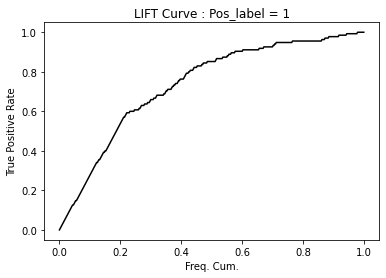

In [ ]:
 res  = (lift_curve(y_test, model_1.predict_proba(X_test), pos_label= 1))

## K Nearest Neighbors (KNN)

📚Cette méthode sur base sur une matrice de distance calculée entre chaque observation de l'échantillon d'apprentissage deux à deux. Il existe plusieurs type de distance <br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

📢 Il est donc essentiel de centrer et réduire les données en amont. Néanmoins pour simplifier notre démarche, nous n'allons pas le faire dans cet exemple.

### Sans GridSearchCV()

On lance l'apprentissage du modèle sur l'échantillon d'entrainement

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

On deploie le modèle sur l'échantillon test

In [ ]:
y_pred = knn_model.predict(X_test)
print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['pred_0','pred_1'], index=['obs_0','obs_1'])

f1_score : 0.6720647773279352


pred_0  pred_1
obs_0     230      29
obs_1      52      83

### Avec GridSearchCV()

On lance l'apprentissage du modèle sur l'échantillon d'entrainement <br>
⚠ Quand il y a beaucoup d'instance dans l'échantillon d'apprentissage, le calcul deux à deux des distances des points peut entraîner un temps de calcul considérablement long. Pour y remedier, on peut utiliser la validation croisée. Dans notre cas cela ne sera pas nécessaire.

In [ ]:
from sklearn.metrics import make_scorer
parameters = {'n_neighbors' : np.arange(1,100,3)}
print(alerteCombinaison(parameters))

knn = KNeighborsClassifier()


f1_scorer = make_scorer(f1_score, pos_label=1)
knn_model = GridSearchCV(knn, parameters, scoring = f1_scorer,
                   cv = ShuffleSplit(test_size=0.30, n_splits=1,
                                     random_state=0), verbose=1)
knn_model.fit(X_train, y_train )

C'est bon tu peux envoyer l'apprentissage !
Nombre de combinaison :
33
Fitting 1 folds for each of 33 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.6s finished


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.3, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])},
             scoring=make_scorer(f1_score, pos_label=1), verbose=1)

In [ ]:
print("Voici les paramètres du meilleure modèle : " + str(knn_model.best_estimator_))
print("Voici le "  + str(knn_model.scorer_) + " du meilleure modèle : " + str(knn_model.best_score_))

Voici les paramètres du meilleure modèle : KNeighborsClassifier(n_neighbors=4)
Voici le make_scorer(f1_score, pos_label=1) du meilleure modèle : 0.6405228758169935


In [ ]:
y_pred = knn_model.predict(X_test)
print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.7043478260869565


pred    0   1  All
obs               
0     245  14  259
1      54  81  135
All   299  95  394

⚠ Dans un KNN, *predict_proba()* ne renvoie pas une réelle probabilité mais plutôt la proportion des classes des K plus proches voisin auxquelles appartient l'instance.

In [ ]:
knn_model.predict_proba(X_test)[0:10]

array([[0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.25, 0.75]])

On ré initialise les listes pour afficher la courbe ROC

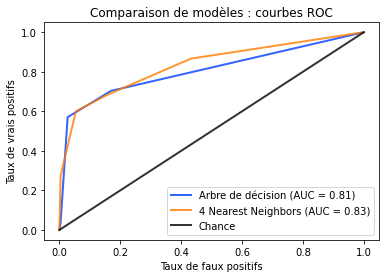

<Figure size 1440x720 with 0 Axes>

In [ ]:
lst_proba = []
lst_label = []

#Model  1
lst_proba.append(dtc_model_2.predict_proba(X_test))
lst_label.append("Arbre de décision ")

#Model  2
lst_proba.append(knn_model.predict_proba(X_test))
lst_label.append("4 Nearest Neighbors ")

print_roc_curv(lst_proba,lst_label,y_test)

## Régression Logistique

💡 Une régression logistique est plus pertinente avec des variables explicatives binaires

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, y_train)
y_pred = reg_log_model.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.6970954356846474


pred    0    1  All
obs                
0     237   22  259
1      51   84  135
All   288  106  394

On s'interesse aux coefficients de chaque variable

In [ ]:
coef = pd.DataFrame(reg_log_model.coef_[0,] ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = reg_log_model.intercept_
coef

Coef
Age        -0.032349
PClass_1st  1.035820
PClass_2nd  0.109113
PClass_3rd -1.145306
Sex_female  1.212487
Sex_male   -1.212860
Constante   0.777959

⚠ Dans un régression logistique, *predict_proba()* renvoie une probabilité des classes auxquelles appartient l'instance.

In [ ]:
reg_log_model.predict_proba(X_test)[0:10]

array([[0.45863977, 0.54136023],
       [0.92625292, 0.07374708],
       [0.24062433, 0.75937567],
       [0.19974475, 0.80025525],
       [0.96194716, 0.03805284],
       [0.37246552, 0.62753448],
       [0.92625292, 0.07374708],
       [0.27768826, 0.72231174],
       [0.58646707, 0.41353293],
       [0.11145474, 0.88854526]])

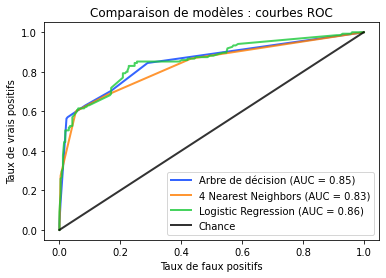

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Add to ROC curve
lst_proba.append(reg_log_model.predict_proba(X_test))
lst_label.append("Logistic Regression ")
print_roc_curv(lst_proba,lst_label,y_test)

## Random Forest

Cette algorithme est une méthode d'ensemble consistant à mettre en place plusieurs modèles d'arbre de décision 🌳🌳🌳

### Sans GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(random_state=0)
rf_model = rfclf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.7228915662650601


pred    0    1  All
obs                
0     235   24  259
1      45   90  135
All   280  114  394

In [ ]:
rf_model.feature_importances_

array([0.39508146, 0.05280959, 0.0226409 , 0.1192067 , 0.21442419,
       0.19583715])

💡 La sortie  *feature_importances_* permet de renseigner les variables influentes dans le modèle

In [ ]:
pd.DataFrame(rf_model.feature_importances_,
             index=X_train.columns.tolist(),
             columns=['Importances']).sort_values(by = 'Importances', ascending=False)

Importances
Age            0.395081
Sex_female     0.214424
Sex_male       0.195837
PClass_3rd     0.119207
PClass_1st     0.052810
PClass_2nd     0.022641

### Avec GridSearch

In [ ]:
parameters = {'n_estimators': np.arange(start = 5, stop = 50, step = 10),
              'max_depth' : np.arange(start =5, stop = 10, step = 2),
              'min_samples_leaf' : np.arange(start = 5, stop = 500, step = 100),
              'min_samples_split' : np.arange(start = 100, stop = 1000, step = 1000),
             'random_state' : [0]}

print(alerteCombinaison(parameters))

rf = RandomForestClassifier()

f1_scorer = make_scorer(f1_score, pos_label=1)
rf_model = GridSearchCV(rf, parameters, scoring = f1_scorer, verbose = 2, cv = 3)
rf_model.fit(X_train, y_train)

C'est bon tu peux envoyer l'apprentissage !
Nombre de combinaison :
75
Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=5, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=5, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=5, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=5, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=5, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=5, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=15, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=15, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=25, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=25, random_state=0, total=   0.1s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=25, random_state=0, total=   0.1s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=35, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=35, random_state=0, total=   0.1s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=35, random_state=0 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=35, random_state=0, total=   0.1s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=35, r

[CV]  max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=15, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=25, random_state=0, total=   0.1s
[CV] max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=25, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=25, random_state=0, total=   0.0s
[CV] max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=35, random_state=0 
[CV]  max_depth=5, min_samples_leaf=305, min_samples_split=100, n_estimators=35, random_state=0, total=   0.1s
[CV] max_depth=5, min_samples_leaf=305, min_samples_split=100

[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=25, random_state=0, total=   0.1s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=25, random_state=0, total=   0.0s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=35, random_state=0 
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=35, random_state=0, total=   0.1s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=35, random_state=0 
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=35, random_state=0, total=   0.1s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=35, random_state=0 
[CV]  max_depth=7, min_samples_leaf=105, min_samples_split=100, n_estimators=35, random_state=0, total=   0.1s
[CV] max_depth=7, min_samples_leaf=105, min_samples_split=100

[CV]  max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=15, random_state=0, total=   0.0s
[CV] max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=15, random_state=0 
[CV]  max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=15, random_state=0, total=   0.0s
[CV] max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=25, random_state=0, total=   0.0s
[CV] max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=25, random_state=0, total=   0.0s
[CV] max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=25, random_state=0 
[CV]  max_depth=7, min_samples_leaf=405, min_samples_split=100, n_estimators=25, random_state=0, total=   0.0s
[CV] max_depth=7, min_samples_leaf=405, min_samples_split=100

[CV]  max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=5, random_state=0, total=   0.0s
[CV] max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=5, random_state=0 
[CV]  max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=5, random_state=0, total=   0.0s
[CV] max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=15, random_state=0 
[CV]  max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=15, random_state=0, total=   0.0s
[CV] max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=15, random_state=0 
[CV]  max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=15, random_state=0, total=   0.0s
[CV] max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=15, random_state=0 
[CV]  max_depth=9, min_samples_leaf=205, min_samples_split=100, n_estimators=15, random_state=0, total=   0.0s
[CV] max_depth=9, min_samples_leaf=205, min_samples_split=100, n

[CV]  max_depth=9, min_samples_leaf=405, min_samples_split=100, n_estimators=45, random_state=0, total=   0.1s
[CV] max_depth=9, min_samples_leaf=405, min_samples_split=100, n_estimators=45, random_state=0 
[CV]  max_depth=9, min_samples_leaf=405, min_samples_split=100, n_estimators=45, random_state=0, total=   0.1s


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   11.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([5, 7, 9]),
                         'min_samples_leaf': array([  5, 105, 205, 305, 405]),
                         'min_samples_split': array([100]),
                         'n_estimators': array([ 5, 15, 25, 35, 45]),
                         'random_state': [0]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=2)

In [ ]:
print("Voici les paramètres du meilleure modèle : " + str(rf_model.best_estimator_))
print("Voici le "  + str(rf_model.scorer_) + " du meilleure modèle : " + str(rf_model.best_score_))

Voici les paramètres du meilleure modèle : RandomForestClassifier(max_depth=5, min_samples_leaf=105, min_samples_split=100,
                       n_estimators=15, random_state=0)
Voici le make_scorer(f1_score, pos_label=1) du meilleure modèle : 0.6770211756909954


In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.6716417910447762


pred    0    1  All
obs                
0     216   43  259
1      45   90  135
All   261  133  394

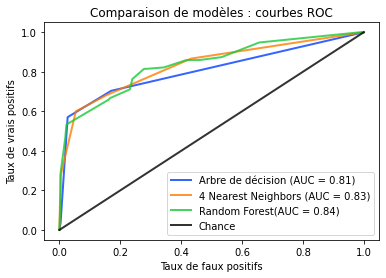

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Add to ROC curve
lst_proba.append(rf_model.predict_proba(X_test))
lst_label.append("Random Forest")
print_roc_curv(lst_proba,lst_label,y_test)

## Bagging

https://en.wikipedia.org/wiki/Bootstrap_aggregating#/media/File:Ensemble_Bagging.svg

On utilise le bagging pour construire un modèle de plusieurs arbres  de décision 🌳🌳🌳. On utilise les mêmes paramètres du meilleur modèle de random forest

In [ ]:
from sklearn.ensemble import BaggingClassifier


bclf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=30),
                         n_estimators=50, random_state=0)

bclf = bclf.fit(X_train, y_train)
y_pred = bclf.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.7166666666666666


pred    0    1  All
obs                
0     240   19  259
1      49   86  135
All   289  105  394

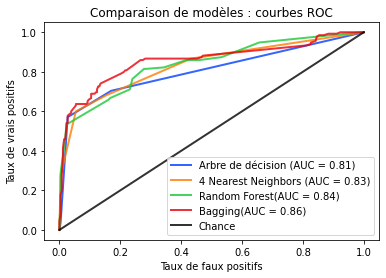

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Add to ROC curve
lst_proba.append(bclf.predict_proba(X_test))
lst_label.append("Bagging")
print_roc_curv(lst_proba,lst_label,y_test)

## Boosting

https://en.wikipedia.org/wiki/Boosting_(machine_learning)#/media/File:Ensemble_Boosting.svg

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gclf = GradientBoostingClassifier(random_state=0, max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50)

gclf = gclf.fit(X_train, y_train)
y_pred = gclf.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred,average='binary', pos_label=1)))

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.7346938775510203


pred    0    1  All
obs                
0     239   20  259
1      45   90  135
All   284  110  394

In [ ]:
pd.DataFrame(gclf.feature_importances_,
             index=X_train.columns.tolist(),
             columns=['Importances']).sort_values(by = 'Importances', ascending=False)

Importances
Sex_female     0.411537
Age            0.236425
PClass_3rd     0.215524
Sex_male       0.096601
PClass_1st     0.038140
PClass_2nd     0.001773

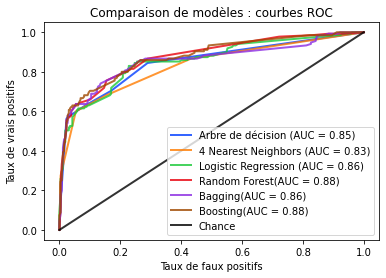

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Add to ROC curve
lst_proba.append(gclf.predict_proba(X_test))
lst_label.append("Boosting")
print_roc_curv(lst_proba,lst_label,y_test)

# Régression

## NBA 🏀

Importer le jeu de données

In [ ]:
nba = pd.read_csv("../Dataset/NBA.csv")

On affiche un extrait des données, un ligne correspond à une tentative de tir durant un match

In [ ]:
nba.head()

GAME_ID LOCATION GAME_RESULT  PERIOD  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  \
0  21400899        A           W       1        10.8         2         1.9   
1  21400899        A           W       1         3.4         0         0.8   
2  21400899        A           W       1         NaN         3         2.7   
3  21400899        A           W       2        10.3         2         1.9   
4  21400899        A           W       2        10.9         2         2.7   

   SHOT_DIST  PTS_TYPE SHOT_RESULT  CLOSE_DEF_DIST        SHOOTER  
0        7.7         2        made             1.3  brian roberts  
1       28.2         3      missed             6.1  brian roberts  
2       10.1         2      missed             0.9  brian roberts  
3       17.2         2      missed             3.4  brian roberts  
4        3.7         2      missed             1.1  brian roberts

On observe des valeurs manquantes, on va les exclure

In [ ]:
print(nba.shape)
nba.describe()

(128069, 12)


GAME_ID         PERIOD     SHOT_CLOCK       DRIBBLES  \
count  1.280690e+05  128069.000000  122502.000000  128069.000000   
mean   2.140045e+07       2.469427      12.453344       2.023355   
std    2.578773e+02       1.139919       5.763265       3.477760   
min    2.140000e+07       1.000000       0.000000       0.000000   
25%    2.140023e+07       1.000000       8.200000       0.000000   
50%    2.140045e+07       2.000000      12.300000       1.000000   
75%    2.140067e+07       3.000000      16.675000       2.000000   
max    2.140091e+07       7.000000      24.000000      32.000000   

          TOUCH_TIME      SHOT_DIST       PTS_TYPE  CLOSE_DEF_DIST  
count  127753.000000  128069.000000  128069.000000   128069.000000  
mean        2.778047      13.571504       2.264670        4.123015  
std         2.984774       8.888964       0.441159        2.756446  
min         0.000000       0.000000       2.000000        0.000000  
25%         0.900000       4.700000       2.000000        2.300000  
50%         1.600000      13.700000       2.000000        3.700000  
75%         3.700000      22.500000       3.000000        5.300000  
max        24.000000      47.200000       3.000000       53.200000

In [ ]:
print(nba.shape)
nba.dropna(axis = 0, how = 'any', inplace = True)
print(nba.shape)

(128069, 12)
(122200, 12)


## Echantillonnage

On crée un objet **X** avec les variables explicatives

Python ne sait pas gérer les variables qualitatives (tout comme la plupart des algorithmes de machine learning), on effectue donc un codage disjonctif complet

In [ ]:
X = nba[['LOCATION','PERIOD','SHOT_CLOCK','DRIBBLES','TOUCH_TIME', 'SHOT_RESULT', 'CLOSE_DEF_DIST', 'PTS_TYPE']]
X  = pd.get_dummies(data=X, columns=['LOCATION', 'SHOT_RESULT'])
X

PERIOD  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  CLOSE_DEF_DIST  PTS_TYPE  \
0            1        10.8         2         1.9             1.3         2   
1            1         3.4         0         0.8             6.1         3   
3            2        10.3         2         1.9             3.4         2   
4            2        10.9         2         2.7             1.1         2   
5            2         9.1         2         4.4             2.6         2   
...        ...         ...       ...         ...             ...       ...   
128063       2        15.3         2         1.6             5.7         2   
128064       3        18.3         5         6.2             0.8         2   
128065       4        19.8         4         5.2             0.6         2   
128066       4        23.0         2         4.2             4.2         2   
128067       4         9.1         4         4.5             3.0         2   

        LOCATION_A  LOCATION_H  SHOT_RESULT_made  SHOT_RESULT_missed  
0                1           0                 1                   0  
1                1           0                 0                   1  
3                1           0                 0                   1  
4                1           0                 0                   1  
5                1           0                 0                   1  
...            ...         ...               ...                 ...  
128063           1           0                 1                   0  
128064           1           0                 0                   1  
128065           1           0                 1                   0  
128066           1           0                 1                   0  
128067           1           0                 0                   1  

[122200 rows x 10 columns]

In [ ]:
Y = nba.SHOT_DIST

On scinde l'échantillon en train / test

In [ ]:
from sklearn.model_selection import train_test_split
#70% des données pour l’apprentissage
#30% des données pour l'échantillon test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size = 0.30,
                                                    random_state = 42)

## Apprentissage

### Régression linéaire multiple

📢 Pour ne pas donner plus d'importance aux variables explicatives à forte variance, il est  essentiel de centrer et réduire les données en amont. Néanmoins pour simplifier notre démarche, nous n'allons pas le faire dans cet exemple.

On lance l'apprentissage du modèle sur l'échantillon d'entrainement

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train,y_train)

On déploie le modèle sur l'échantillon test

In [ ]:
y_pred = model.predict(X_test)

On utilise le RMSE comme métrique

In [ ]:
from sklearn.metrics import mean_squared_error
#on multiplie par 0.3 pour avoir un résultat en metre
mean_squared_error(y_test, y_pred, squared=False) * 0.3

1.586616060753421

📢 On s'interesse aux coefficients de la régression

In [ ]:
coef = pd.DataFrame(lm.coef_ ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = lm.intercept_
coef

Coef
PERIOD              -0.059840
SHOT_CLOCK          -0.222172
DRIBBLES             0.064247
TOUCH_TIME           0.074390
CLOSE_DEF_DIST       0.953962
PTS_TYPE            12.123811
LOCATION_A           0.025348
LOCATION_H          -0.025348
SHOT_RESULT_made    -0.869653
SHOT_RESULT_missed   0.869653
Constante          -15.353932

1️⃣ On remarque que les modalités des variables **SHOT_RESULT** et **LOCATION** ont des coefficients inversés. C'est pourquoi il est important d'enlever les variables explicatives qui sont trop corrélées entre elles. C'est la raison pour laquelle on construit généralement K-1 indicatrices lors d'un codage disjonctif complet. La dernière modalité étant induite par les autres.

2️⃣ Sans suprise les variables qui contribuent le plus sont aussi celles qui sont le plus corrélés avec notre variable à expliquer

In [ ]:
cm = sns.light_palette("green", as_cmap=True)

pd.DataFrame(nba.corr()).\
style.background_gradient(cmap=cm).set_precision(2)

## Fromage 🧀

Importer le jeu de données

In [5]:
fromage = pd.read_table(path + "fromage.txt", index_col=0)
fromage.head()

calories  sodium  calcium  lipides  retinol  folates  proteines  \
Fromages                                                                       
CarredelEst       314   353.5     72.6     26.3     51.6     30.3       21.0   
Babybel           314   238.0    209.8     25.1     63.7      6.4       22.6   
Beaufort          401   112.0    259.4     33.3     54.9      1.2       26.6   
Bleu              342   336.0    211.1     28.9     37.1     27.5       20.2   
Camembert         264   314.0    215.9     19.5    103.0     36.4       23.4   

             cholesterol  magnesium  
Fromages                             
CarredelEst           70         20  
Babybel               70         27  
Beaufort             120         41  
Bleu                  90         27  
Camembert             60         20

L'objectif est de modéliser la variable *calories*. On s'intéresse aux corrélations entre la variables calories et les autres

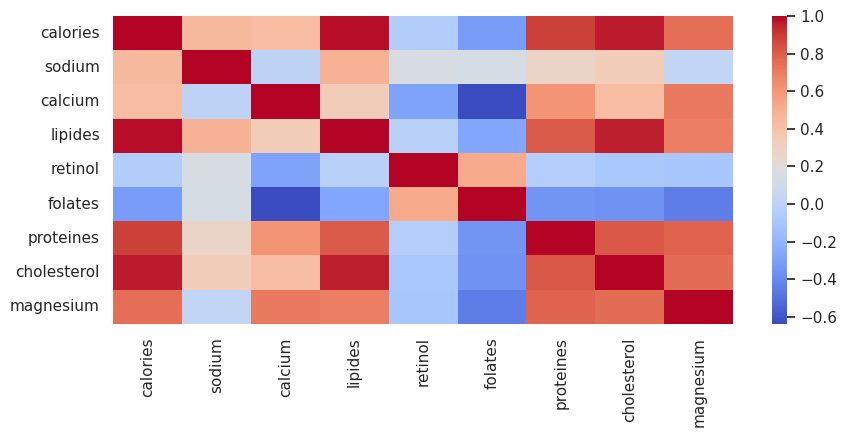

In [6]:
sns.set(rc={'figure.figsize':(10,4)})

df_corr = fromage.corr()

ax = sns.heatmap(df_corr, xticklabels = fromage.columns ,
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

## Echantillonnage

On crée un objet **X** avec les variables explicatives et **Y** la variable à expliquer

In [7]:
X = fromage[fromage.columns.difference(['calories'])]
Y = fromage.calories

On scinde l'échantillon en train / test

In [8]:
from sklearn.model_selection import train_test_split
#70% des données pour l’apprentissage
#30% des données pour l'échantillon test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

## Apprentissage

📢 Pour ne pas donner plus d'importance aux variables explicatives à forte variance, il est  essentiel de centrer et réduire les données en amont. Cette fois-ci, nous allons le faire dans cet exemple.

### 👨🏻‍🏫 Principe de centrer et réduire

Centrer et réduire les variables explicatives permet de les transformer à la même échelle. Une variable explicative avec des millions d'euros aura donc la même échelle qu'une variable explicative avec des centimètres comme unité.

In [ ]:
millions = pd.Series(np.linspace(1000000,9000000,9), name='millions')
cm = pd.Series(np.linspace(1,9,9), name='cm')

X = pd.DataFrame(pd.concat([cm, millions], axis=1))
X

cm   millions
0  1.0  1000000.0
1  2.0  2000000.0
2  3.0  3000000.0
3  4.0  4000000.0
4  5.0  5000000.0
5  6.0  6000000.0
6  7.0  7000000.0
7  8.0  8000000.0
8  9.0  9000000.0

On centre sur la moyenne de chaque série

In [ ]:
Xcentrer = X.copy()
Xcentrer['cm'] = X['cm'] - X['cm'].mean()
Xcentrer['millions'] = X['millions'] - X['millions'].mean()
Xcentrer

cm   millions
0 -4.0 -4000000.0
1 -3.0 -3000000.0
2 -2.0 -2000000.0
3 -1.0 -1000000.0
4  0.0        0.0
5  1.0  1000000.0
6  2.0  2000000.0
7  3.0  3000000.0
8  4.0  4000000.0

On réduit en divisant par l'écart-type de chaque série <br>

⚠ Par défaut, pandas calcule un écart-type estimé où le diviseur utilisé dans le calcul de l'écart-type est *N - ddof*. <br> https://en.wikipedia.org/wiki/Standard_deviation#Estimation <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

In [ ]:
Xcentrer_reduire = Xcentrer.copy()
Xcentrer_reduire['cm'] = Xcentrer['cm'] / (X['cm'].std(ddof = 0))
Xcentrer_reduire['millions'] = Xcentrer['millions'] / (X['millions'].std(ddof = 0))
Xcentrer_reduire

cm  millions
0 -1.549193 -1.549193
1 -1.161895 -1.161895
2 -0.774597 -0.774597
3 -0.387298 -0.387298
4  0.000000  0.000000
5  0.387298  0.387298
6  0.774597  0.774597
7  1.161895  1.161895
8  1.549193  1.549193

On a donc les deux variables explicatives à la même échelle 👌🏻

On peut calculer cela automatiquement avec la librairie **scikit-learn** et la méthode *StandardScaler( )*

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XCR = scaler.fit_transform(X)
pd.DataFrame(XCR,columns=['cm', 'millions'])

cm  millions
0 -1.549193 -1.549193
1 -1.161895 -1.161895
2 -0.774597 -0.774597
3 -0.387298 -0.387298
4  0.000000  0.000000
5  0.387298  0.387298
6  0.774597  0.774597
7  1.161895  1.161895
8  1.549193  1.549193

💡 La méthode *inverse_transform( )* permet de revenir aux échelles de départ

In [ ]:
pd.DataFrame(scaler.inverse_transform(XCR), columns=['cm', 'millions'])

cm   millions
0  1.0  1000000.0
1  2.0  2000000.0
2  3.0  3000000.0
3  4.0  4000000.0
4  5.0  5000000.0
5  6.0  6000000.0
6  7.0  7000000.0
7  8.0  8000000.0
8  9.0  9000000.0

On centre et réduit les données d'apprentissage

In [ ]:
X_train.head(3)

calcium  cholesterol  folates  lipides  magnesium  \
Fromages                                                                
Fr.chevrepatemolle     72.8           50     31.0     18.5         16   
Fr.frais20nat.        146.3           10     20.0      3.5         11   
Edam                  272.2           80      5.5     24.7         44   

                    proteines  retinol  sodium  
Fromages                                        
Fr.chevrepatemolle       11.1    150.5   160.0  
Fr.frais20nat.            8.3     50.0    41.0  
Edam                     24.7     65.7   148.0

In [14]:
scaler_X_train = StandardScaler()
X_train_CR = scaler_X_train.fit_transform(X_train)
pd.DataFrame(X_train_CR, columns=X_train.columns).head(3)

calcium  cholesterol   folates   lipides  magnesium  proteines   retinol  \
0 -1.646861    -0.734586  1.366103 -0.574613  -0.993131  -1.210300  2.915299   
1 -0.626595    -2.192822  0.441072 -2.404590  -1.463809  -1.615179 -0.814176   
2  1.121042     0.359090 -0.778288  0.181778   1.642667   0.756257 -0.231561   

     sodium  
0 -0.633340  
1 -1.755716  
2 -0.746521

### Régression linéaire multiple

On lance l'apprentissage du modèle sur l'échantillon d'entrainement

In [11]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train_CR,y_train)

On s'intéresse aux coefficients du modèle

In [13]:
coef = pd.DataFrame(lr_model.coef_ ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = lr_model.intercept_
coef

Coef
calcium       -5.073331
cholesterol   12.227441
folates       -0.772965
lipides       54.595479
magnesium      6.537986
proteines     23.623463
retinol       -3.068287
sodium         4.134236
Constante    289.600000

📢 On déploie le modèle sur l'échantillon test mais pour cela il faut transformer les variables explicatives de l'échantillon test avec <font color=red> les caractéristiques de l'échantillon d'apprentissage </font>

In [15]:
X_test_CR = scaler_X_train.transform(X_test)
y_pred = lr_model.predict(X_test_CR)
y_pred

array([328.32822851, 115.56392955, 381.71161079, 343.32390581,
       391.06480538, 416.70146788, 298.70663555, 325.91085251,
       332.42681253])

On utilise le RMSE ou le R² comme métrique

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 10.617822685887052
R² : 0.9832554810662609


### Régression Ridge

👨🏻‍🏫 Le principe de Ridge est d'homogénéiser les coefficients attribués à chaque variable explicative. Plus le paramètre alpha est élevé, plus les coeffcients sont homogènes. <br>
La difficulté réside dans l'optimisation du paramètre alpha :

* un alpha trop faible peut entrainer un sur apprentissage
* un alpha trop fort peut entrainer un sous apprentissage

#### Sans GridSearchCV

In [23]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0)
ridge_model = ridge_model.fit(X_train_CR,y_train)

y_pred = ridge_model.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 10.617822685887058
R² : 0.9832554810662609


On s'intéresse aux coefficients du modèle

In [24]:
coef = pd.DataFrame(ridge_model.coef_ ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = ridge_model.intercept_
coef

Coef
calcium       -5.073331
cholesterol   12.227441
folates       -0.772965
lipides       54.595479
magnesium      6.537986
proteines     23.623463
retinol       -3.068287
sodium         4.134236
Constante    289.600000

#### Avec GridSearchCV

In [ ]:
parameters = {'alpha': np.arange(start = 0, stop = 10, step = 0.05)}

print(alerteCombinaison(parameters))

ridge_model = Ridge()

ridge_model = GridSearchCV(ridge_model, parameters,
                           scoring = 'r2', verbose = 1)
ridge_model.fit(X_train_CR, y_train)

C'est bon tu peux envoyer l'apprentissage !
Nombre de combinaison :
200
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.9s finished


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25...
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55, 7.6 , 7.65,
       7.7 , 7.75, 7.8 , 7.85, 7.9 , 7.95, 8.  , 8.05, 8.1 , 8.15, 8.2 ,
       8.25, 8.3 , 8.35, 8.4 , 8.45, 8.5 , 8.55, 8.6 , 8.65, 8.7 , 8.75,
       8.8 , 8.85, 8.9 , 8.95, 9.  , 9.05, 9.1 , 9.15, 9.2 , 9.25, 9.3 ,
       9.35, 9.4 , 9.45, 9.5 , 9.55, 9.6 , 9.65, 9.7 , 9

In [ ]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.75}
0.9422136599428306


In [ ]:
y_pred = ridge_model.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 11.929406998917113
R² : 0.9788631897113634


On s'intéresse aux coefficients du modèle

In [ ]:
coef = pd.DataFrame(ridge_model.best_estimator_.coef_ ,
                    index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = ridge_model.best_estimator_.intercept_
coef

Coef
calcium       -7.185359
cholesterol   24.190201
folates       -0.915579
lipides       37.242539
magnesium      9.414569
proteines     24.967881
retinol       -2.586617
sodium         7.036454
Constante    289.600000

### Régression Lasso

👨🏻‍🏫 Le principe de Lasso est de faire de la sélection de variable en abaissant les coefficients attribués à chaque variable explicative. Plus le paramètre alpha est élevé, plus les coeffcients tendent vers 0. <br>
La difficulté réside dans l'optimisation du paramètre alpha :

* un alpha trop faible peut entrainer un sur apprentissage
* un alpha trop fort peut entrainer un sous apprentissage

#### Sans GridSearchCV

In [29]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=10)
lasso_model = lasso_model.fit(X_train_CR,y_train)

y_pred = lasso_model.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 12.819147550112175
R² : 0.9755926836276307


On s'intéresse aux coefficients du modèle

In [30]:
coef = pd.DataFrame(lasso_model.coef_ ,
                    index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = lasso_model.intercept_
coef

Coef
calcium        0.000000
cholesterol    8.311069
folates       -0.000000
lipides       59.685827
magnesium      0.000000
proteines     16.355030
retinol       -0.000000
sodium         0.000000
Constante    289.600000

#### Avec GridSearchCV

In [ ]:
parameters = {'alpha': np.arange(start = 0, stop = 10, step = 0.05)}

print(alerteCombinaison(parameters))

lasso_model = Lasso()

lasso_model = GridSearchCV(lasso_model, parameters,
                           scoring = 'r2', verbose = 2)
lasso_model.fit(X_train_CR, y_train)

C'est bon tu peux envoyer l'apprentissage !
Nombre de combinaison :
200
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.0s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.0s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.0s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.0s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291.05034356353065, tolerance: 11.158793750000001
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:

[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.35000000000000003 .......................................
[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.35000000000000003 .......................................
[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] .

[CV] ......................... alpha=1.2000000000000002, total=   0.0s
[CV] alpha=1.2000000000000002 ........................................
[CV] ......................... alpha=1.2000000000000002, total=   0.0s
[CV] alpha=1.2000000000000002 ........................................
[CV] ......................... alpha=1.2000000000000002, total=   0.0s
[CV] alpha=1.25 ......................................................
[CV] ....................................... alpha=1.25, total=   0.0s
[CV] alpha=1.25 ......................................................
[CV] ....................................... alpha=1.25, total=   0.0s
[CV] alpha=1.25 ......................................................
[CV] ....................................... alpha=1.25, total=   0.0s
[CV] alpha=1.25 ......................................................
[CV] ....................................... alpha=1.25, total=   0.0s
[CV] alpha=1.25 ......................................................
[CV] .

[CV] ........................................ alpha=2.1, total=   0.0s
[CV] alpha=2.1 .......................................................
[CV] ........................................ alpha=2.1, total=   0.0s
[CV] alpha=2.1 .......................................................
[CV] ........................................ alpha=2.1, total=   0.0s
[CV] alpha=2.15 ......................................................
[CV] ....................................... alpha=2.15, total=   0.0s
[CV] alpha=2.15 ......................................................
[CV] ....................................... alpha=2.15, total=   0.0s
[CV] alpha=2.15 ......................................................
[CV] ....................................... alpha=2.15, total=   0.0s
[CV] alpha=2.15 ......................................................
[CV] ....................................... alpha=2.15, total=   0.0s
[CV] alpha=2.15 ......................................................
[CV] .

[CV] ....................................... alpha=2.95, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] ........................................ alpha=3.0, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] ........................................ alpha=3.0, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] ........................................ alpha=3.0, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] ........................................ alpha=3.0, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] ........................................ alpha=3.0, total=   0.0s
[CV] alpha=3.0500000000000003 ........................................
[CV] ......................... alpha=3.0500000000000003, total=   0.0s
[CV] alpha=3.0500000000000003 ........................................
[CV] .

[CV] ....................................... alpha=3.85, total=   0.0s
[CV] alpha=3.85 ......................................................
[CV] ....................................... alpha=3.85, total=   0.0s
[CV] alpha=3.85 ......................................................
[CV] ....................................... alpha=3.85, total=   0.0s
[CV] alpha=3.9000000000000004 ........................................
[CV] ......................... alpha=3.9000000000000004, total=   0.0s
[CV] alpha=3.9000000000000004 ........................................
[CV] ......................... alpha=3.9000000000000004, total=   0.0s
[CV] alpha=3.9000000000000004 ........................................
[CV] ......................... alpha=3.9000000000000004, total=   0.0s
[CV] alpha=3.9000000000000004 ........................................
[CV] ......................... alpha=3.9000000000000004, total=   0.0s
[CV] alpha=3.9000000000000004 ........................................
[CV] .

[CV] .......................... alpha=4.800000000000001, total=   0.0s
[CV] alpha=4.800000000000001 .........................................
[CV] .......................... alpha=4.800000000000001, total=   0.0s
[CV] alpha=4.800000000000001 .........................................
[CV] .......................... alpha=4.800000000000001, total=   0.0s
[CV] alpha=4.8500000000000005 ........................................
[CV] ......................... alpha=4.8500000000000005, total=   0.0s
[CV] alpha=4.8500000000000005 ........................................
[CV] ......................... alpha=4.8500000000000005, total=   0.0s
[CV] alpha=4.8500000000000005 ........................................
[CV] ......................... alpha=4.8500000000000005, total=   0.0s
[CV] alpha=4.8500000000000005 ........................................
[CV] ......................... alpha=4.8500000000000005, total=   0.0s
[CV] alpha=4.8500000000000005 ........................................
[CV] .

[CV] .......................... alpha=5.800000000000001, total=   0.0s
[CV] alpha=5.800000000000001 .........................................
[CV] .......................... alpha=5.800000000000001, total=   0.0s
[CV] alpha=5.800000000000001 .........................................
[CV] .......................... alpha=5.800000000000001, total=   0.0s
[CV] alpha=5.800000000000001 .........................................
[CV] .......................... alpha=5.800000000000001, total=   0.0s
[CV] alpha=5.800000000000001 .........................................
[CV] .......................... alpha=5.800000000000001, total=   0.0s
[CV] alpha=5.8500000000000005 ........................................
[CV] ......................... alpha=5.8500000000000005, total=   0.0s
[CV] alpha=5.8500000000000005 ........................................
[CV] ......................... alpha=5.8500000000000005, total=   0.0s
[CV] alpha=5.8500000000000005 ........................................
[CV] .

[CV] ........................................ alpha=6.7, total=   0.0s
[CV] alpha=6.7 .......................................................
[CV] ........................................ alpha=6.7, total=   0.0s
[CV] alpha=6.75 ......................................................
[CV] ....................................... alpha=6.75, total=   0.0s
[CV] alpha=6.75 ......................................................
[CV] ....................................... alpha=6.75, total=   0.0s
[CV] alpha=6.75 ......................................................
[CV] ....................................... alpha=6.75, total=   0.0s
[CV] alpha=6.75 ......................................................
[CV] ....................................... alpha=6.75, total=   0.0s
[CV] alpha=6.75 ......................................................
[CV] ....................................... alpha=6.75, total=   0.0s
[CV] alpha=6.800000000000001 .........................................
[CV] .

[CV] ....................................... alpha=7.65, total=   0.0s
[CV] alpha=7.65 ......................................................
[CV] ....................................... alpha=7.65, total=   0.0s
[CV] alpha=7.65 ......................................................
[CV] ....................................... alpha=7.65, total=   0.0s
[CV] alpha=7.65 ......................................................
[CV] ....................................... alpha=7.65, total=   0.0s
[CV] alpha=7.65 ......................................................
[CV] ....................................... alpha=7.65, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] ........................................ alpha=7.7, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] ........................................ alpha=7.7, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] .

[CV] ........................................ alpha=8.5, total=   0.0s
[CV] alpha=8.5 .......................................................
[CV] ........................................ alpha=8.5, total=   0.0s
[CV] alpha=8.5 .......................................................
[CV] ........................................ alpha=8.5, total=   0.0s
[CV] alpha=8.55 ......................................................
[CV] ....................................... alpha=8.55, total=   0.0s
[CV] alpha=8.55 ......................................................
[CV] ....................................... alpha=8.55, total=   0.0s
[CV] alpha=8.55 ......................................................
[CV] ....................................... alpha=8.55, total=   0.0s
[CV] alpha=8.55 ......................................................
[CV] ....................................... alpha=8.55, total=   0.0s
[CV] alpha=8.55 ......................................................
[CV] .

[CV] ....................................... alpha=9.25, total=   0.0s
[CV] alpha=9.25 ......................................................
[CV] ....................................... alpha=9.25, total=   0.0s
[CV] alpha=9.25 ......................................................
[CV] ....................................... alpha=9.25, total=   0.0s
[CV] alpha=9.3 .......................................................
[CV] ........................................ alpha=9.3, total=   0.0s
[CV] alpha=9.3 .......................................................
[CV] ........................................ alpha=9.3, total=   0.0s
[CV] alpha=9.3 .......................................................
[CV] ........................................ alpha=9.3, total=   0.0s
[CV] alpha=9.3 .......................................................
[CV] ........................................ alpha=9.3, total=   0.0s
[CV] alpha=9.3 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.2s finished


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25...
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55, 7.6 , 7.65,
       7.7 , 7.75, 7.8 , 7.85, 7.9 , 7.95, 8.  , 8.05, 8.1 , 8.15, 8.2 ,
       8.25, 8.3 , 8.35, 8.4 , 8.45, 8.5 , 8.55, 8.6 , 8.65, 8.7 , 8.75,
       8.8 , 8.85, 8.9 , 8.95, 9.  , 9.05, 9.1 , 9.15, 9.2 , 9.25, 9.3 ,
       9.35, 9.4 , 9.45, 9.5 , 9.55, 9.6 , 9.65, 9.7 , 9

In [ ]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1.75}
0.9444127991415874


In [ ]:
y_pred = lasso_model.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 9.494427925157296
R² : 0.9866112712855608


On s'intéresse aux coefficients du modèle

In [ ]:
coef = pd.DataFrame(lasso_model.best_estimator_.coef_ ,
                    index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = lasso_model.best_estimator_.intercept_
coef

Coef
calcium        0.000000
cholesterol   10.703956
folates       -0.000000
lipides       61.120001
magnesium      2.580706
proteines     19.491825
retinol       -0.000000
sodium         0.387715
Constante    289.600000

### Régression Elasticnet

👨🏻‍🏫 Le principe de Elasticnet est de combiné les bienfaits des méthodes Ridges et Lasso.
La difficulté réside dans l'optimisation des paramètres :

1. alpha
    * un alpha trop faible peut entrainer un sur apprentissage
    * un alpha trop fort peut entrainer un sous apprentissage
2. l1_ratio
    * Plus le l1_ratio est proche de 1, plus on privilégie la méthode Lasso
    * Plus le l1_ratio est proche de 0, plus on privilégie la méthode Ridge



#### Sans GridSearchCV

In [33]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=10, l1_ratio=0.8)
elastic_model = elastic_model.fit(X_train_CR,y_train)

y_pred = elastic_model.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 40.48968627499674
R² : 0.7565047119949017


On s'intéresse aux coefficients du modèle

In [34]:
coef = pd.DataFrame(elastic_model.coef_ ,
                    index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = elastic_model.intercept_
coef

Coef
calcium        1.502710
cholesterol   14.935285
folates       -0.000000
lipides       15.600006
magnesium      9.416283
proteines     12.084470
retinol        0.000000
sodium         7.341198
Constante    289.600000

#### Avec GridSearchCV

In [ ]:
parameters = {'alpha' : np.arange(0,10,1),
             'l1_ratio' : np.arange(0,1,0.2)}

elastic_model = ElasticNet()
elastic_model = GridSearchCV(elastic_model, parameters,
                             scoring = 'r2', verbose=2, cv = 2)
elastic_model.fit(X_train_CR, y_train )

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] alpha=0, l1_ratio=0.0 ...........................................
[CV] ............................ alpha=0, l1_ratio=0.0, total=   0.0s
[CV] alpha=0, l1_ratio=0.0 ...........................................
[CV] ............................ alpha=0, l1_ratio=0.0, total=   0.0s
[CV] alpha=0, l1_ratio=0.2 ...........................................
[CV] ............................ alpha=0, l1_ratio=0.2, total=   0.0s
[CV] alpha=0, l1_ratio=0.2 ...........................................
[CV] ............................ alpha=0, l1_ratio=0.2, total=   0.0s
[CV] alpha=0, l1_ratio=0.4 ...........................................
[CV] ............................ alpha=0, l1_ratio=0.4, total=   0.0s
[CV] alpha=0, l1_ratio=0.4 ...........................................
[CV] ............................ alpha=0, l1_ratio=0.4, total=   0.0s
[CV] alpha=0, l1_ratio=0.6000000000000001 ............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.46335213886775, tolerance: 8.413810000000002
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\U

[CV] ............................ alpha=3, l1_ratio=0.4, total=   0.0s
[CV] alpha=3, l1_ratio=0.4 ...........................................
[CV] ............................ alpha=3, l1_ratio=0.4, total=   0.0s
[CV] alpha=3, l1_ratio=0.6000000000000001 ............................
[CV] ............. alpha=3, l1_ratio=0.6000000000000001, total=   0.0s
[CV] alpha=3, l1_ratio=0.6000000000000001 ............................
[CV] ............. alpha=3, l1_ratio=0.6000000000000001, total=   0.0s
[CV] alpha=3, l1_ratio=0.8 ...........................................
[CV] ............................ alpha=3, l1_ratio=0.8, total=   0.0s
[CV] alpha=3, l1_ratio=0.8 ...........................................
[CV] ............................ alpha=3, l1_ratio=0.8, total=   0.0s
[CV] alpha=4, l1_ratio=0.0 ...........................................
[CV] ............................ alpha=4, l1_ratio=0.0, total=   0.0s
[CV] alpha=4, l1_ratio=0.0 ...........................................
[CV] .

C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21562.30274998512, tolerance: 8.413810000000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20896.655971536587, tolerance: 8.22469
  model = cd_fast.enet_coordinate_descent(
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23824.56393839429, tolerance: 8.413810000000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_mode

[CV] ............................ alpha=7, l1_ratio=0.8, total=   0.0s
[CV] alpha=7, l1_ratio=0.8 ...........................................
[CV] ............................ alpha=7, l1_ratio=0.8, total=   0.0s
[CV] alpha=8, l1_ratio=0.0 ...........................................
[CV] ............................ alpha=8, l1_ratio=0.0, total=   0.0s
[CV] alpha=8, l1_ratio=0.0 ...........................................
[CV] ............................ alpha=8, l1_ratio=0.0, total=   0.0s
[CV] alpha=8, l1_ratio=0.2 ...........................................
[CV] ............................ alpha=8, l1_ratio=0.2, total=   0.0s
[CV] alpha=8, l1_ratio=0.2 ...........................................
[CV] ............................ alpha=8, l1_ratio=0.2, total=   0.0s
[CV] alpha=8, l1_ratio=0.4 ...........................................
[CV] ............................ alpha=8, l1_ratio=0.4, total=   0.0s
[CV] alpha=8, l1_ratio=0.4 ...........................................
[CV] .

C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27487.64375943053, tolerance: 8.22469
  model = cd_fast.enet_coordinate_descent(
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29399.777507893443, tolerance: 8.413810000000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28511.277820129813, tolerance: 8.22469
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=2, estimator=ElasticNet(),
             param_grid={'alpha': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8])},
             scoring='r2', verbose=2)

In [ ]:
y_pred = elastic_model.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared = False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 14.02799681284452
R² : 0.97077240673853


In [ ]:
print(elastic_model.best_params_)
print(elastic_model.best_score_)

{'alpha': 1, 'l1_ratio': 0.8}
0.9544137874687357


On s'intéresse aux coefficients du modèle

In [ ]:
coef = pd.DataFrame(elastic_model.best_estimator_.coef_ ,
                    index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = elastic_model.best_estimator_.intercept_
coef

Coef
calcium       -1.127099
cholesterol   25.987901
folates        0.000000
lipides       30.359146
magnesium     10.427037
proteines     20.013044
retinol       -0.000000
sodium         8.517124
Constante    289.600000

🎭 Les résultats de la regression Elasticnet avec les paramètres ci-dessous sont identiques à la régression Lasso avec un alpha = 0.5  (ci-dessus).

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_lasso = ElasticNet(alpha=5, l1_ratio=1)
elastic_lasso = elastic_lasso.fit(X_train_CR,y_train)

y_pred = elastic_lasso.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 9.807638766274678
R² : 0.9857133415876698


In [ ]:
coef = pd.DataFrame(elastic_lasso.coef_ ,
                    index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = elastic_lasso.intercept_
coef

Coef
calcium        0.000000
cholesterol    9.971900
folates       -0.000000
lipides       60.672502
magnesium      1.008486
proteines     18.535141
retinol       -0.000000
sodium         0.000000
Constante    289.600000

🎭 Les résultats de la regression Elasticnet avec les paramètres ci-dessous sont identiques à la régression Ridge avec un alpha = 0.5  (ci-dessus).

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_ridge = ElasticNet(alpha=0.5/X_train.shape[0], l1_ratio=0)
elastic_ridge = elastic_ridge.fit(X_train_CR,y_train)

y_pred = elastic_ridge.predict(X_test_CR)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 11.771556612076479
R² : 0.9794188551584696


C:\Users\anthony.sardellitti\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1254.4540872598523, tolerance: 16.89388
  model = cd_fast.enet_coordinate_descent(


In [ ]:
coef = pd.DataFrame(elastic_ridge.coef_ ,
                    index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = elastic_ridge.intercept_
coef

Coef
calcium       -7.332159
cholesterol   22.824829
folates       -1.020307
lipides       39.444875
magnesium      8.924860
proteines     25.236362
retinol       -2.752582
sodium         6.582597
Constante    289.600000

# Aller plus loin  🚀

## SVM Classification

### Simulation du dataset 1

Source : https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
# Construct dataset
X, Y = make_gaussian_quantiles(cov=3.,
                                 n_samples=2000, n_features=2,
                                 n_classes=2, random_state=1)
X = pd.DataFrame(X,columns=['x','y'])
Y = pd.Series(Y)

In [ ]:
Y.value_counts()

1    1000
0    1000
dtype: int64

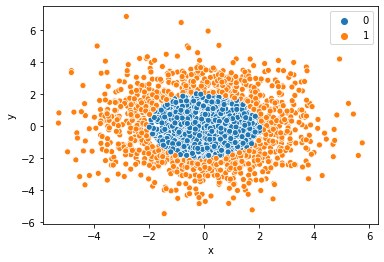

In [ ]:
sns.scatterplot(data=X, x="x", y="y", hue=Y)

### Echantillonnage

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y)
print(X_train.shape)
print(len(y_train))

(1400, 2)
1400


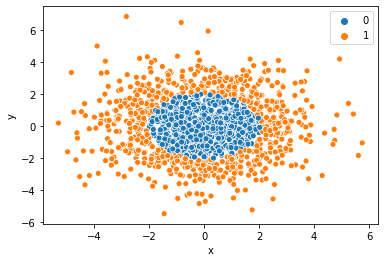

In [ ]:
sns.scatterplot(data=X_train, x="x", y="y", hue=y_train)

In [ ]:
from sklearn.svm import SVC

Si mauvaise prédiction : ❌ <br>
Si bonne prédiction : 🔴

#### SVM avec kernel linéaire

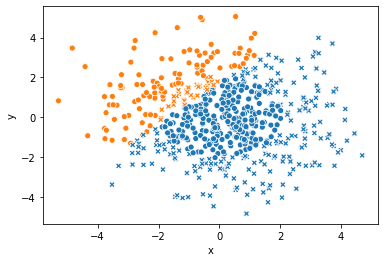

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
style = pd.Series(y_pred != y_test).astype('int')
sns.scatterplot(data=X_test, x="x", y="y", hue=y_pred, style = style, legend = None)

#### SVM avec kernel polynomiale

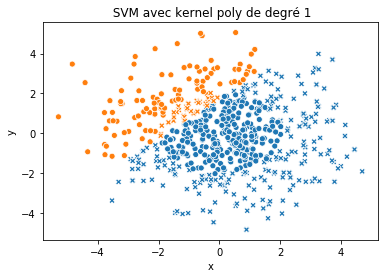

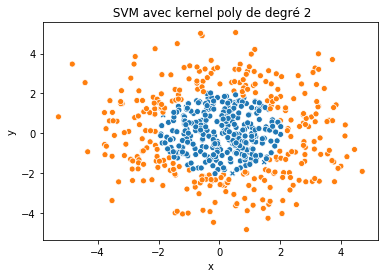

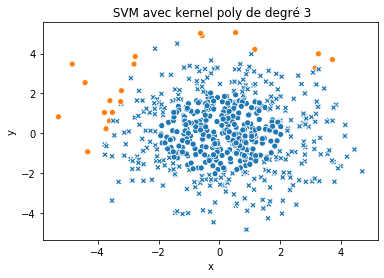

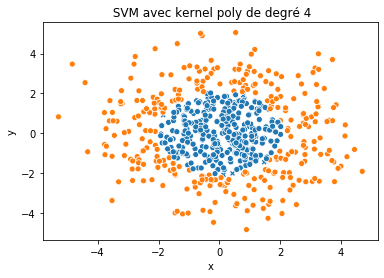

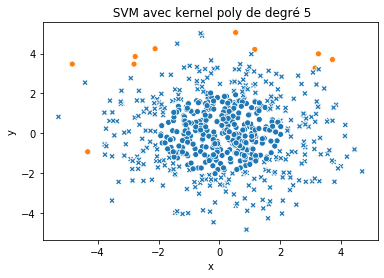

In [ ]:
for i in [1,2,3,4,5]:
    svclassifier = SVC(kernel='poly', degree=i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    style = pd.Series(y_pred != y_test).astype('int')
    sns.scatterplot(data=X_test, x="x", y="y", hue=y_pred, style=style, legend=None)
    plt.title('SVM avec kernel poly de degré ' + str(i))
    plt.show()

### Simulation du dataset 2

Source : https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922

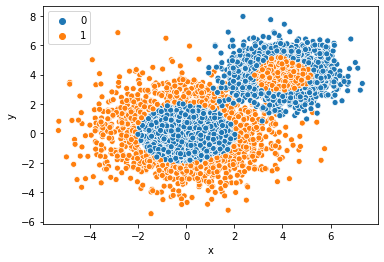

In [ ]:
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=2000, n_features=2,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)
# Gaussian 2
X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1,
                                 n_samples=2000, n_features=2,
                                 n_classes=2, random_state=1)
X2 = pd.DataFrame(X2,columns=['x','y'])
y2 = pd.Series(y2)
# Combine the gaussians
X1.shape
X2.shape

X = pd.DataFrame(np.concatenate((X1, X2)), columns=['x','y'])
Y = pd.Series(np.concatenate((y1, - y2 + 1)))

sns.scatterplot(data=X , x="x", y="y", hue=Y)

### Echantillonnage

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y)
print(X_train.shape)
print(len(y_train))

(2800, 2)
2800


#### SVM avec kernel polynomiale

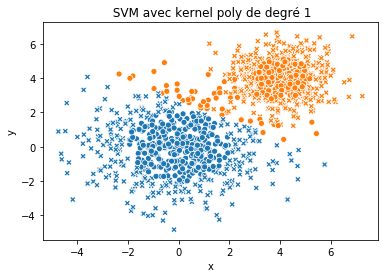

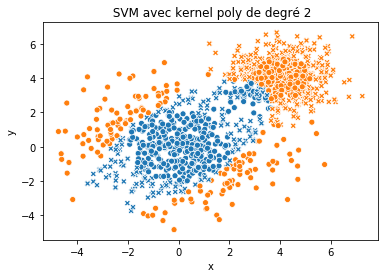

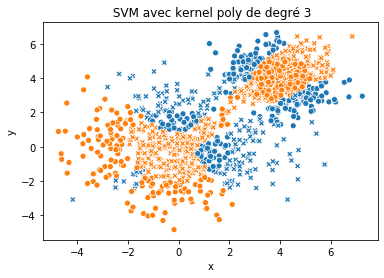

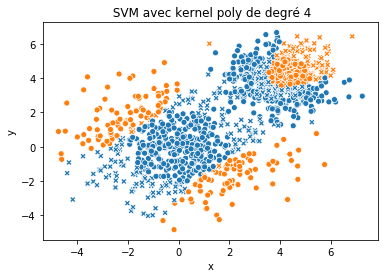

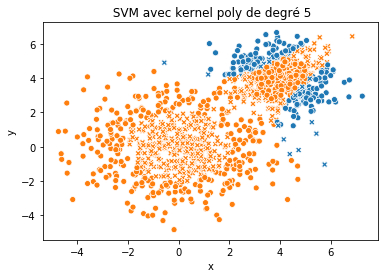

In [ ]:
for i in [1,2,3,4,5]:
    svclassifier = SVC(kernel='poly', degree=i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    style = pd.Series(y_pred != y_test).astype('int')
    sns.scatterplot(data=X_test, x="x", y="y", hue=y_pred, style=style, legend=None)
    plt.title('SVM avec kernel poly de degré ' + str(i))
    plt.show()

#### SVM avec kernel gaussien

Plus d'infos sur les paramètres gamma et C sur https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

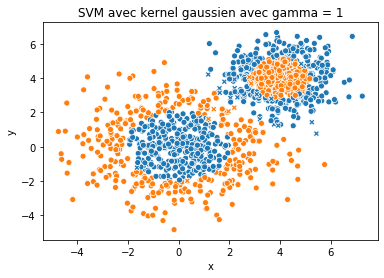

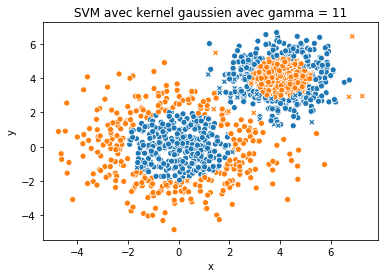

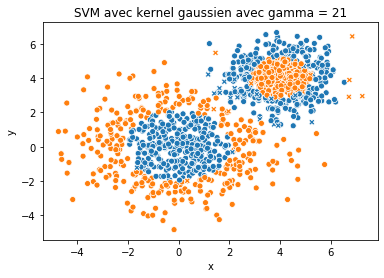

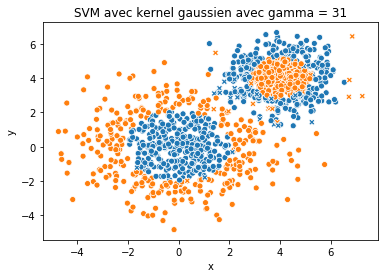

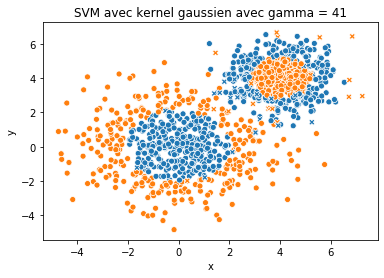

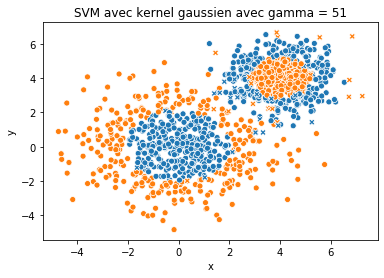

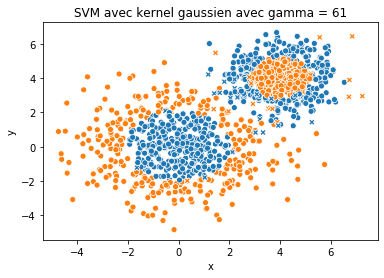

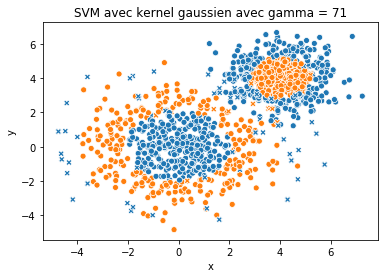

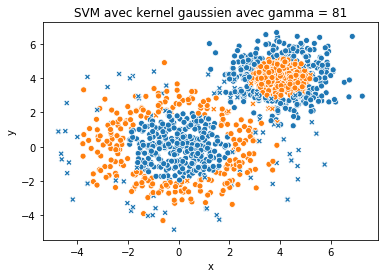

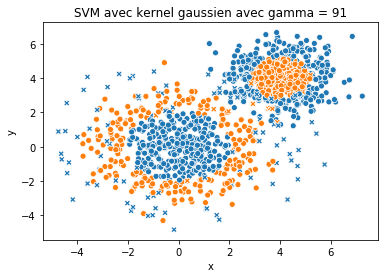

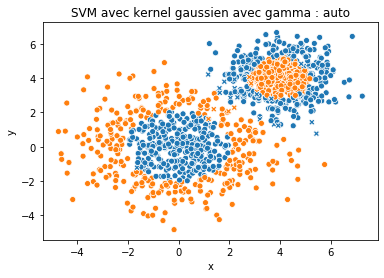

In [ ]:
for i in np.arange(1,100,10):
    svclassifier = SVC(kernel='rbf', gamma=i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    style = pd.Series(y_pred != y_test).astype('int')
    sns.scatterplot(data=X_test, x="x", y="y", hue=y_pred, style=style, legend=None)
    plt.title('SVM avec kernel gaussien avec gamma = ' + str(i))
    plt.show()

svclassifier = SVC(kernel='rbf', gamma='auto')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
style = pd.Series(y_pred != y_test).astype('int')
sns.scatterplot(data=X_test, x="x", y="y", hue=y_pred, style=style, legend=None)
plt.title('SVM avec kernel gaussien avec gamma : auto')
plt.show()

#### SVM avec kernel sigmoid

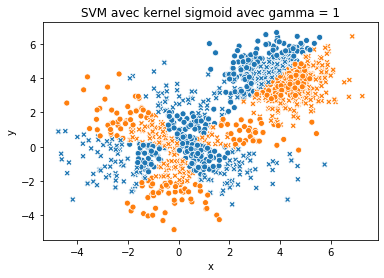

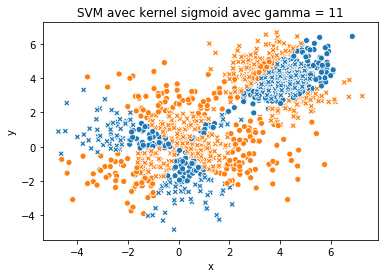

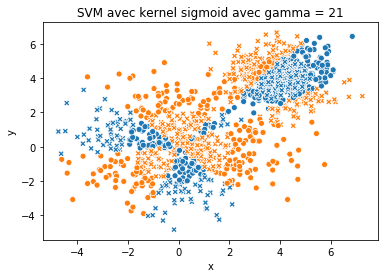

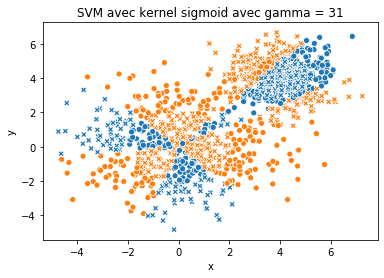

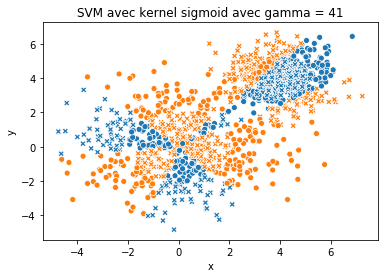

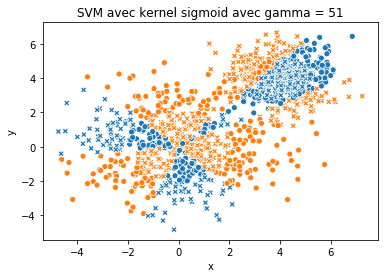

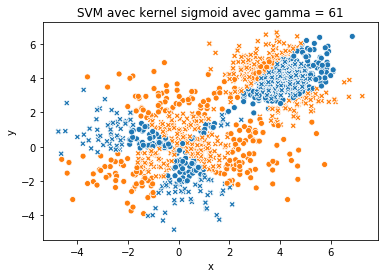

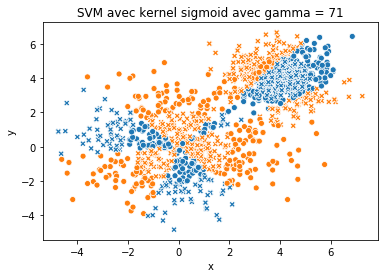

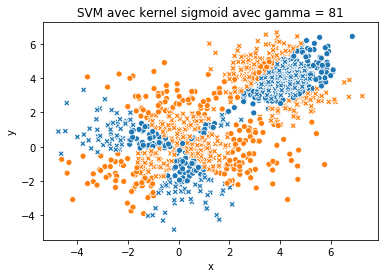

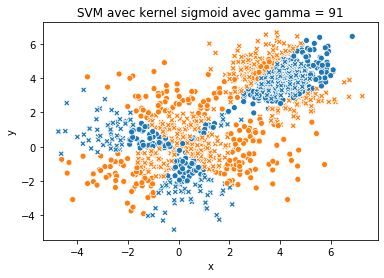

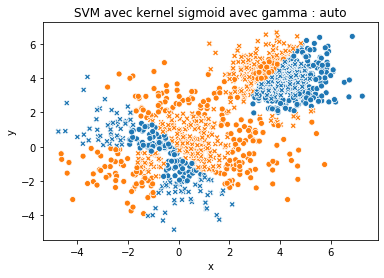

In [ ]:
for i in np.arange(1,100,10):
    svclassifier = SVC(kernel='sigmoid', gamma=i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    style = pd.Series(y_pred != y_test).astype('int')
    sns.scatterplot(data=X_test, x="x", y="y", hue=y_pred, style=style, legend=None)
    plt.title('SVM avec kernel sigmoid avec gamma = ' + str(i))
    plt.show()

svclassifier = SVC(kernel='sigmoid', gamma='auto')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
style = pd.Series(y_pred != y_test).astype('int')
sns.scatterplot(data=X_test, x="x", y="y", hue=y_pred, style=style, legend=None)
plt.title('SVM avec kernel sigmoid avec gamma : auto')
plt.show()

### Simulation du dataset

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
X  = pd.DataFrame(X)
print(X.shape)
X.head()

(506, 13)


0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [ ]:
Y  = pd.Series(y)
len(Y)

506

### Echantillonnage

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
print(X_train.shape)
print(len(y_train))

(354, 13)
354


In [ ]:
scaler_X_train = StandardScaler()
X_train_CR = scaler_X_train.fit_transform(X_train)
pd.DataFrame(X_train_CR, columns=X_train.columns).head(3)

0         1         2       3         4         5         6  \
0 -0.351614 -0.488295 -0.203527 -0.2246 -0.111634 -0.217630 -0.567699   
1 -0.437705 -0.488295 -0.070755 -0.2246 -1.250691  0.199580 -2.205887   
2 -0.441875 -0.488295 -1.057064 -0.2246 -0.407267  0.055324  0.162749   

          7         8         9        10        11        12  
0 -0.547520 -0.668915 -0.657477 -0.032387  0.442385 -0.951019  
1  0.722446 -0.668915 -0.651550  0.333029  0.301083 -0.850049  
2 -0.222616 -0.554521 -0.704891 -0.854573  0.428437 -0.908721

In [ ]:
X_test_CR = scaler_X_train.transform(X_test)
pd.DataFrame(X_test_CR).head(3)

0         1         2       3         4         5         6  \
0 -0.433711 -0.488295 -1.226312 -0.2246 -0.972448  2.535956  0.254941   
1 -0.446134  0.282894 -1.446626 -0.2246 -1.223736  1.171184 -0.330126   
2 -0.411846  0.393064 -0.632484 -0.2246 -0.807241 -0.593826 -0.947106   

          7         8         9        10        11        12  
0 -0.137360 -0.897703 -0.823424 -0.215095  0.442385 -1.192530  
1  2.610650 -0.783309 -1.179026  0.058967  0.403117 -0.668574  
2  0.310655 -0.783309 -1.137539  0.058967  0.353870  0.006838

#### Regression linéaire multiple

RMSE : 5.381337624583084
R² : 0.6802979835116887


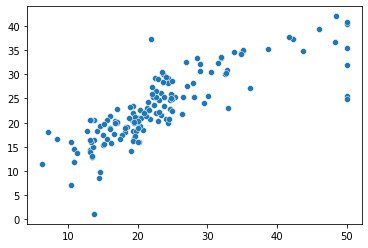

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred,legend = None)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

#### SVM avec kernel linéaire

RMSE : 5.890445529626127
R² : 0.6169449579632416


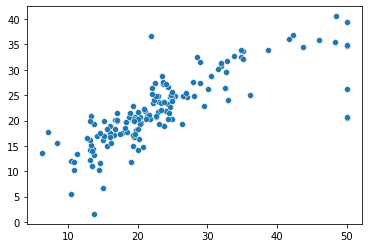

In [ ]:
svmregressor = SVR(kernel='linear')
svmregressor.fit(X_train, y_train)

y_pred = svmregressor.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred,legend = None)

print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

#### SVM avec kernel polynomiale

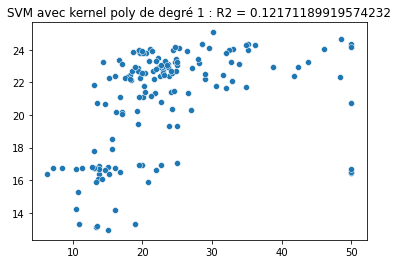

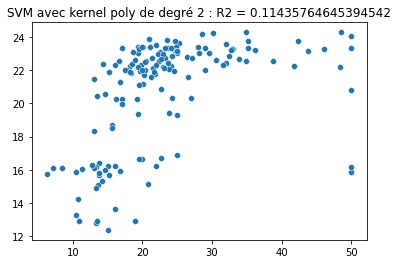

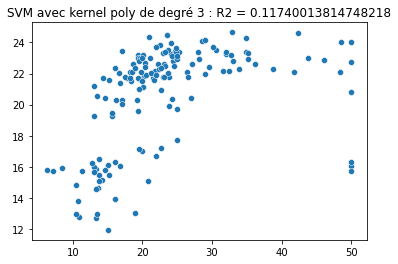

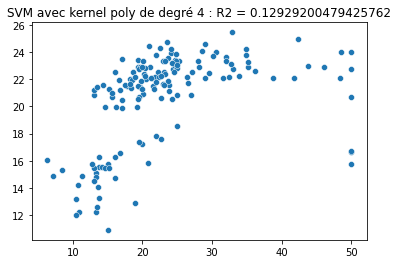

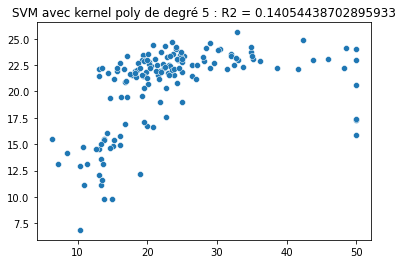

In [ ]:
for i in [1,2,3,4,5]:
    svmregressor = SVR(kernel='poly', degree=i)
    svmregressor.fit(X_train, y_train)
    y_pred = svmregressor.predict(X_test)
    sns.scatterplot(x= y_test, y=y_pred,legend=None)
    plt.title('SVM avec kernel poly de degré ' + str(i) + " : R2 = " + str(r2_score(y_test, y_pred)))
    plt.show()

#### SVM avec kernel gaussien

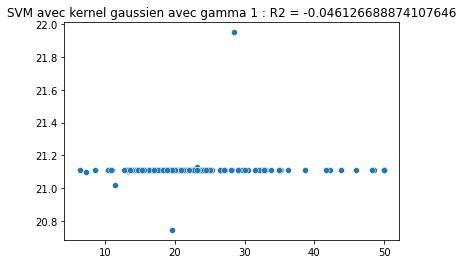

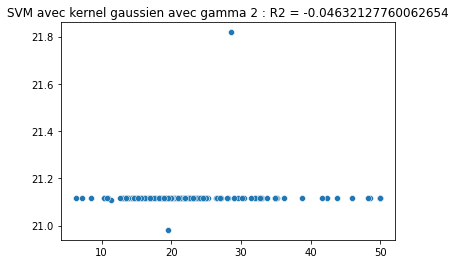

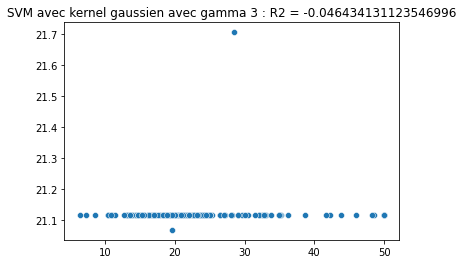

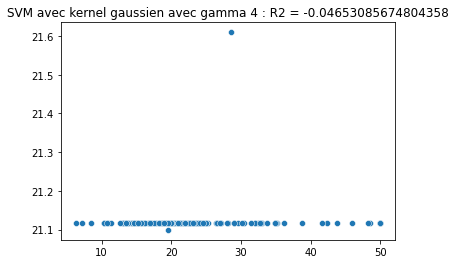

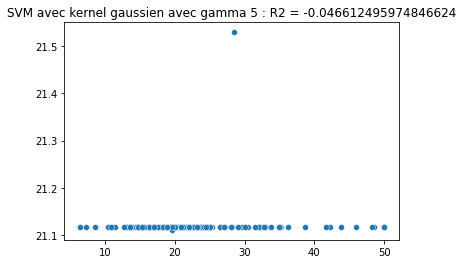

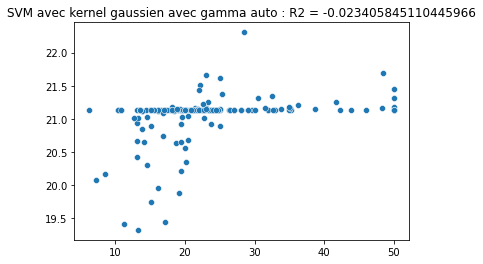

In [ ]:
for i in [1,2,3,4,5]:
    svmregressor = SVR(kernel='rbf', gamma=i)
    svmregressor.fit(X_train, y_train)
    y_pred = svmregressor.predict(X_test)
    sns.scatterplot(x= y_test, y=y_pred,legend=None)
    plt.title('SVM avec kernel gaussien avec gamma ' + str(i) + " : R2 = " + str(r2_score(y_test, y_pred)))
    plt.show()

svmregressor = SVR(kernel='rbf', gamma='auto')
svmregressor.fit(X_train, y_train)
y_pred = svmregressor.predict(X_test)
sns.scatterplot(x= y_test, y=y_pred,legend=None)
plt.title('SVM avec kernel gaussien avec gamma auto' " : R2 = " + str(r2_score(y_test, y_pred)))
plt.show()

#### SVM avec kernel sigmoid

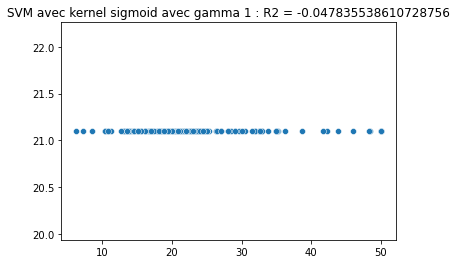

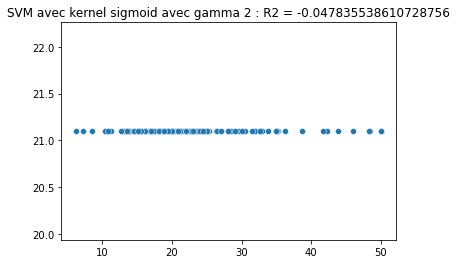

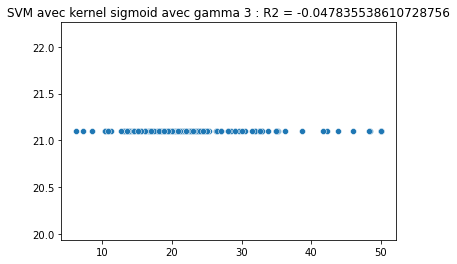

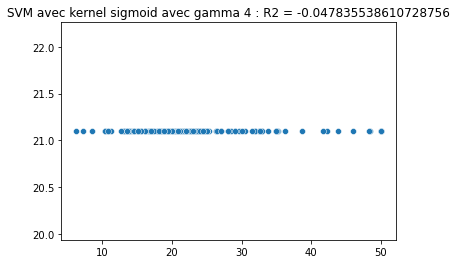

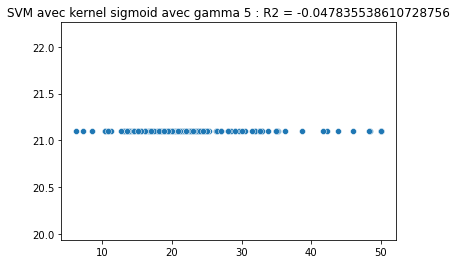

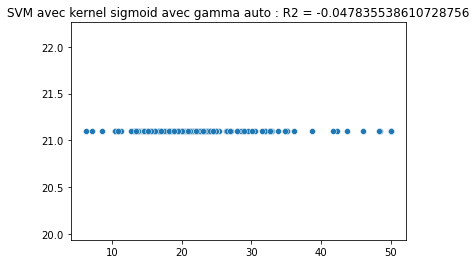

In [ ]:
for i in [1,2,3,4,5]:
    svmregressor = SVR(kernel='sigmoid', gamma=i)
    svmregressor.fit(X_train, y_train)
    y_pred = svmregressor.predict(X_test)
    sns.scatterplot(x= y_test, y=y_pred,legend=None)
    plt.title('SVM avec kernel sigmoid avec gamma ' + str(i) + " : R2 = " + str(r2_score(y_test, y_pred)))
    plt.show()

svmregressor = SVR(kernel='sigmoid', gamma='auto')
svmregressor.fit(X_train, y_train)
y_pred = svmregressor.predict(X_test)
sns.scatterplot(x= y_test, y=y_pred,legend=None)
plt.title('SVM avec kernel sigmoid avec gamma auto' " : R2 = " + str(r2_score(y_test, y_pred)))
plt.show()

## Réseaux de neurones

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
RN = MLPRegressor(hidden_layer_sizes=(100,2),  activation='identity')

RN.fit(X_train,y_train)

D:\Programmes\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='identity', hidden_layer_sizes=(100, 2))

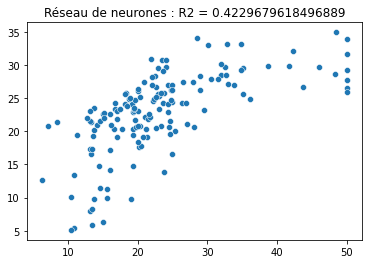

In [ ]:
y_pred = RN.predict(X_test)
sns.scatterplot(x= y_test, y=y_pred,legend=None)
plt.title('Réseau de neurones' " : R2 = " + str(r2_score(y_test, y_pred)))
plt.show()

## Arbre de régression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR = DecisionTreeRegressor(max_depth = 40,min_samples_split = 2, min_samples_leaf = 1)

DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40)

RMSE : 5.384388984540595


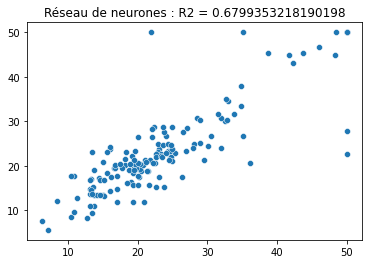

In [ ]:
y_pred = DTR.predict(X_test)
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
sns.scatterplot(x= y_test, y=y_pred,legend=None)
plt.title('Réseau de neurones' " : R2 = " + str(r2_score(y_test, y_pred)))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(n_estimators = 100, max_depth = 40,min_samples_split = 2, min_samples_leaf = 1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=40)

RMSE : 4.834280665479776


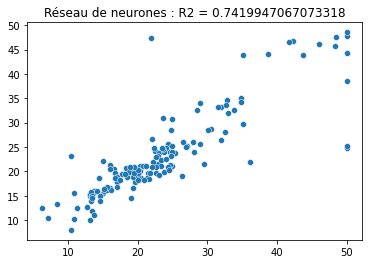

In [ ]:
y_pred = regr.predict(X_test)
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
sns.scatterplot(x= y_test, y=y_pred,legend=None)
plt.title('Réseau de neurones' " : R2 = " + str(r2_score(y_test, y_pred)))
plt.show()

## Boosting

RMSE : 5.362932341650684


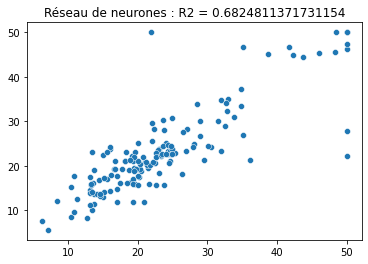

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor(max_depth = 40,min_samples_split = 2, min_samples_leaf = 1,
                       n_estimators=200)

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
sns.scatterplot(x= y_test, y=y_pred,legend=None)
plt.title('Réseau de neurones' " : R2 = " + str(r2_score(y_test, y_pred)))
plt.show()

## SMOTE

Extrait de la source : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

0    9900
1     100
dtype: int64


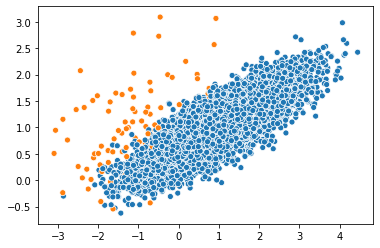

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

print(pd.Series(y).value_counts())
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, legend=None)

1    9900
0    9900
dtype: int64


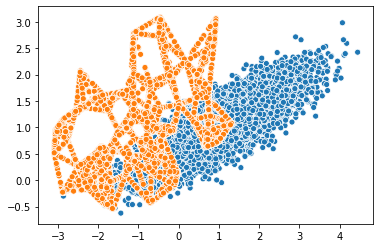

In [ ]:
oversample = SMOTE()
X_bis, y_bis = oversample.fit_resample(X, y)

print(pd.Series(y_bis).value_counts())
sns.scatterplot(x=X_bis[:,0], y=X_bis[:,1], hue=y_bis, legend=None)

## Borderline-SMOTE

1    9900
0    9900
dtype: int64


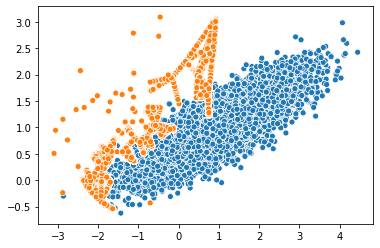

In [ ]:
oversample = BorderlineSMOTE()
X_bis, y_bis = oversample.fit_resample(X, y)

print(pd.Series(y_bis).value_counts())
sns.scatterplot(x=X_bis[:,0], y=X_bis[:,1], hue=y_bis, legend=None)